# **Customer Behavior Analysis for VoizFM**


Background: The audiobook VoizFM currently lacks a personalization scheme for customers. They have tracked and collected data from users' answer to survey and their listening time. **The data used in this project is extracted based on users who have answered the app's survey only, and the app's user acquisition target is set according to the demography của paid user.**

Main tasks:


*   Analyse the user demography
*   Analyse the users' interests based on their answers to the survey
*   Analyse the listening behavior of users
*   Derive insights from the analysis so that a personalization plan can be developed in the future.



Libraries used in this project: pandas, numpy, matplotlib, seaborn.









In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Overview of data

In [72]:
df_survey_id = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Final TP dataset.xlsx',sheet_name='Survey ID')
df_playlist = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Final TP dataset.xlsx',sheet_name='Playlist ID')
df_user_vip_survey = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Final TP dataset.xlsx',sheet_name='user_vip_survey')
df_user_free_survey = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Final TP dataset.xlsx',sheet_name='user_free_survey')
df_user_free_listenings = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Final TP dataset.xlsx',sheet_name='user_free_listenings')
df_user_vip_listenings = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Final TP dataset.xlsx',sheet_name='user_vip_listenings')

In [73]:
print("Overview of df_survey_id:")
display(df_survey_id.info())

print("\nOverview of df_playlist:")
display(df_playlist.info())

print("\nOverview of df_user_vip_survey:")
display(df_user_vip_survey.info())

print("\nOverview of df_user_free_survey:")
display(df_user_free_survey.info())

print("\nOverview of df_user_free_listenings:")
display(df_user_free_listenings.info())

print("\nOverview of df_user_vip_listenings:")
display(df_user_vip_listenings.info())

Overview of df_survey_id:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      31 non-null     int64 
 1   NAME    31 non-null     object
dtypes: int64(1), object(1)
memory usage: 628.0+ bytes


None


Overview of df_playlist:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49855 entries, 0 to 49854
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Playlist ID      49855 non-null  int64 
 1   Audio ID         49855 non-null  int64 
 2   Playlist Name    49855 non-null  object
 3   Category tầng 2  49855 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


None


Overview of df_user_vip_survey:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   USER ID                1162 non-null   int64         
 1   User
Birthday          1162 non-null   datetime64[ns]
 2   User Gender            1162 non-null   int64         
 3   Voice Gender           1162 non-null   int64         
 4   Voice
Region           1162 non-null   int64         
 5   Podcast                441 non-null    float64       
 6   Tóm tắt sách           286 non-null    float64       
 7   Thiếu nhi              141 non-null    float64       
 8   Chính trị              319 non-null    float64       
 9   Lịch sử                368 non-null    float64       
 10  Thiền                  298 non-null    float64       
 11  Ngủ ngon               245 non-null    float64       
 12  Đôi lứa                149 no

None


Overview of df_user_free_survey:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   USER ID                1222 non-null   int64         
 1   User
Birthday          1222 non-null   datetime64[ns]
 2   User Gender            1222 non-null   int64         
 3   Voice Gender           1222 non-null   int64         
 4   Voice
Region           1222 non-null   int64         
 5   Podcast                459 non-null    float64       
 6   Tóm tắt sách           325 non-null    float64       
 7   Thiếu nhi              171 non-null    float64       
 8   Chính trị              319 non-null    float64       
 9   Lịch sử                378 non-null    float64       
 10  Thiền                  249 non-null    float64       
 11  Ngủ ngon               321 non-null    float64       
 12  Đôi lứa                213 n

None


Overview of df_user_free_listenings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9767 entries, 0 to 9766
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   USER ID   9767 non-null   int64
 1   audio_id  9767 non-null   int64
 2   duration  9767 non-null   int64
dtypes: int64(3)
memory usage: 229.0 KB


None


Overview of df_user_vip_listenings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89991 entries, 0 to 89990
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   USER ID   89991 non-null  int64
 1   audio_id  89991 non-null  int64
 2   duration  89991 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB


None

Overall, there are 1162 VIP users and 1222 Free users. There are 25 categories available in the survey. The non-null values in each categories is the number of "likes" clicked by the users.

# User demography analysis

Insights on Users who participated in surveys (both Free and VIP)
- Age distribution
- Gender distribution
- Category distribution


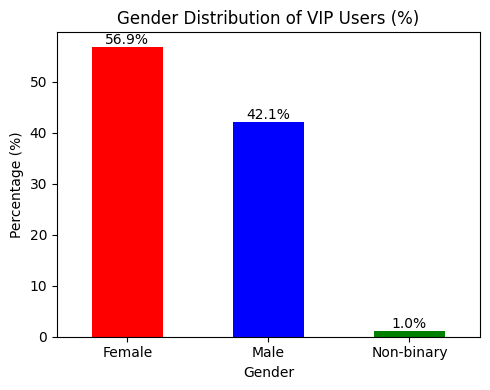

In [74]:
gender_count_by_id=df_user_vip_survey.groupby('User Gender').size()
gender_percentage_by_id = gender_count_by_id / gender_count_by_id.sum() * 100


plt.figure(figsize=(5, 4))
ax = gender_percentage_by_id.plot(kind='bar',color=['Red', 'Blue', 'Green'])
plt.title('Gender Distribution of VIP Users (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'Non-binary'],rotation=0)


for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.tight_layout()
plt.show()

In [75]:
current_year = pd.to_datetime('now').year
df_user_vip_survey['Age'] = current_year - df_user_vip_survey['User\nBirthday'].dt.year
df_user_free_survey['Age'] = current_year - df_user_free_survey['User\nBirthday'].dt.year


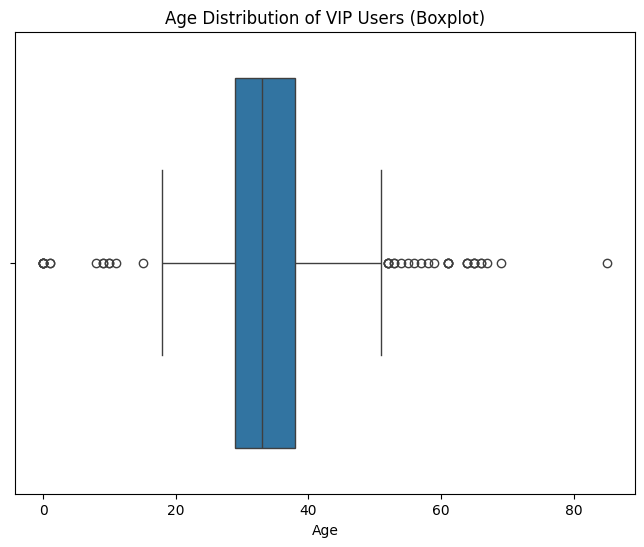

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_user_vip_survey['Age'])
plt.title('Age Distribution of VIP Users (Boxplot)')
plt.xlabel('Age')
plt.show()

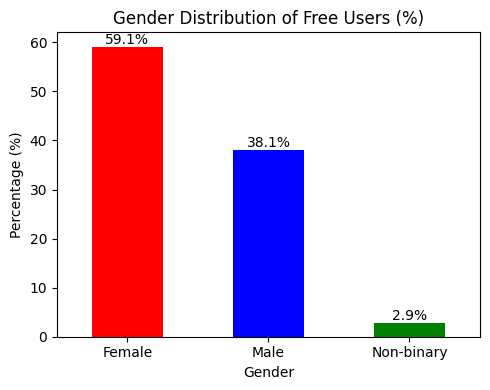

In [77]:
gender_count_by_id=df_user_free_survey.groupby('User Gender').size()
gender_percentage_by_id = gender_count_by_id / gender_count_by_id.sum() * 100


plt.figure(figsize=(5, 4))
ax = gender_percentage_by_id.plot(kind='bar',color=['Red', 'Blue', 'Green'])
plt.title('Gender Distribution of Free Users (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'Non-binary'], rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.tight_layout()
plt.show()

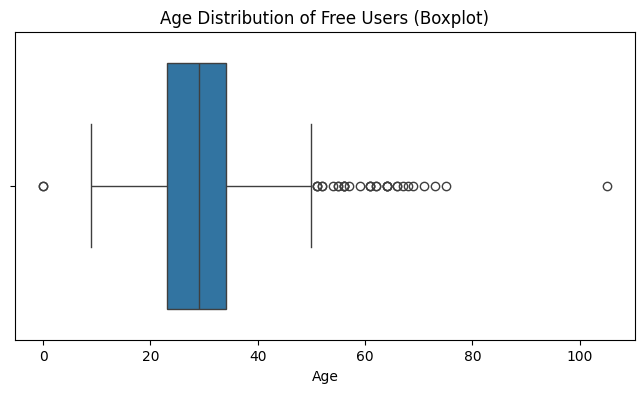

In [78]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_user_free_survey['Age'])
plt.title('Age Distribution of Free Users (Boxplot)')
plt.xlabel('Age')
plt.show()

Outlier analysis

In [79]:
# Calculating IQR VIP

IQR = df_user_vip_survey['Age'].quantile(0.75) - df_user_vip_survey['Age'].quantile(0.25)

#Calculating upper bound
Upper = df_user_vip_survey['Age'].quantile(0.75) + 1.5*IQR

#Calculating lower bound
Lower = df_user_vip_survey['Age'].quantile(0.25) - 1.5*IQR

# Calculating IQR free

IQR_free = df_user_free_survey['Age'].quantile(0.75) - df_user_vip_survey['Age'].quantile(0.25)

#Calculating upper bound
Upper_free = df_user_free_survey['Age'].quantile(0.75) + 1.5*IQR

#Calculating lower bound
Lower_free = df_user_free_survey['Age'].quantile(0.25) - 1.5*IQR

print('IQR =', IQR_free, '\nUpper bound =', Upper_free, '\nLower bound =', Lower_free)

count =  0
for i in df_user_vip_survey['Age']:
  if i > Upper or i < Lower:
    count += 1
print('Outlier number for VIP:',count,', corresponding to',round(count/len(df_user_vip_survey['Age'])*100,3),'%')
count =  0
for i in df_user_free_survey['Age']:
  if i > Upper_free or i < Lower_free:
    count += 1
print('Outlier number for Free:',count,', corresponding to',round(count/len(df_user_free_survey['Age'])*100,3),'%')


IQR = 5.0 
Upper bound = 47.5 
Lower bound = 9.5
Outlier number for VIP: 42 , corresponding to 3.614 %
Outlier number for Free: 44 , corresponding to 3.601 %


Outliers account for less than 5% in both datasets, which indicates that both are relatively good and clean datasets. There are some zeros in the Age column, which are caused by the fact that the users are allowed to freely report their ages. Some of them might skip (which is recorded as 0) or put 0 in this part.

## Compare the similarity of distributions
The *Bhattacharyya distance* [1] is a measure of similarity between two probability distributions. For age distributions, which are usually discrete histograms or probability mass functions (PMFs), we can make use the Bhattacharyya distance to quantify how similar the two distributions are.

For probability distributions $P$ and $Q$ on the same discrete domain $X$
, the Bhattacharyya distance is defined as

$$
D_B(P,Q)= -\text{ln}\left(\sum_{x\in X}\sqrt{P(x)Q(x)} \right).
$$
Larger values of $D_B$ mean the distributions are **more dissimilar**.




Reference

[1] Bhattacharyya, A. . "On a measure of divergence between two statistical populations defined by their probability distributions". *Bulletin of the Calcutta Mathematical Society*. 35: 99–109, Mar 1943.

In [80]:
# Group age into bins
def age_bin_distribution(age_column):
    count_array = np.zeros(7)
    for age in age_column:
      if age < 18:
        count_array[0] += 1
      elif 18 <=age <= 22:
        count_array[1] += 1
      elif 23 <= age < 30:
        count_array[2] += 1
      elif 30 <=age <= 34:
        count_array[3] += 1
      elif 34 <age <= 39:
        count_array[4] += 1
      elif 40 <=age < 44:
        count_array[5] += 1
      else:
        count_array[6] += 1
    return count_array

age_bin_free = age_bin_distribution(df_user_free_survey['Age'])
age_bin_vip = age_bin_distribution(df_user_vip_survey['Age'])

normalized_age_bin_free = age_bin_free / np.sum(age_bin_free)
normalized_age_bin_vip = age_bin_vip / np.sum(age_bin_vip)


# Compute Bhattacharyya coefficient
bc = np.sum(np.sqrt(normalized_age_bin_free * normalized_age_bin_vip))

# Compute Bhattacharyya distance
distance = -np.log(bc)


print("Bhattacharyya Coefficient for Age:", bc)
print("Bhattacharyya Distance for Age:", distance)

gender_count_by_id_free=df_user_free_survey.groupby('User Gender').count()['USER ID'].to_numpy()
gender_count_by_id_vip=df_user_vip_survey.groupby('User Gender').count()['USER ID'].to_numpy()

normalized_gender_count_by_id_free = gender_count_by_id_free / np.sum(gender_count_by_id_free)
normalized_gender_count_by_id_vip = gender_count_by_id_vip / np.sum(gender_count_by_id_vip)

# Compute Bhattacharyya coefficient
bc = np.sum(np.sqrt(normalized_gender_count_by_id_free * normalized_gender_count_by_id_vip))

# Compute Bhattacharyya distance
distance = -np.log(bc)

print("Bhattacharyya Coefficient for Gender:", bc)
print("Bhattacharyya Distance for Gender:", distance)

Bhattacharyya Coefficient for Age: 0.9594204156000496
Bhattacharyya Distance for Age: 0.04142591059080959
Bhattacharyya Coefficient for Gender: 0.9971027327741515
Bhattacharyya Distance for Gender: 0.00290147242889956


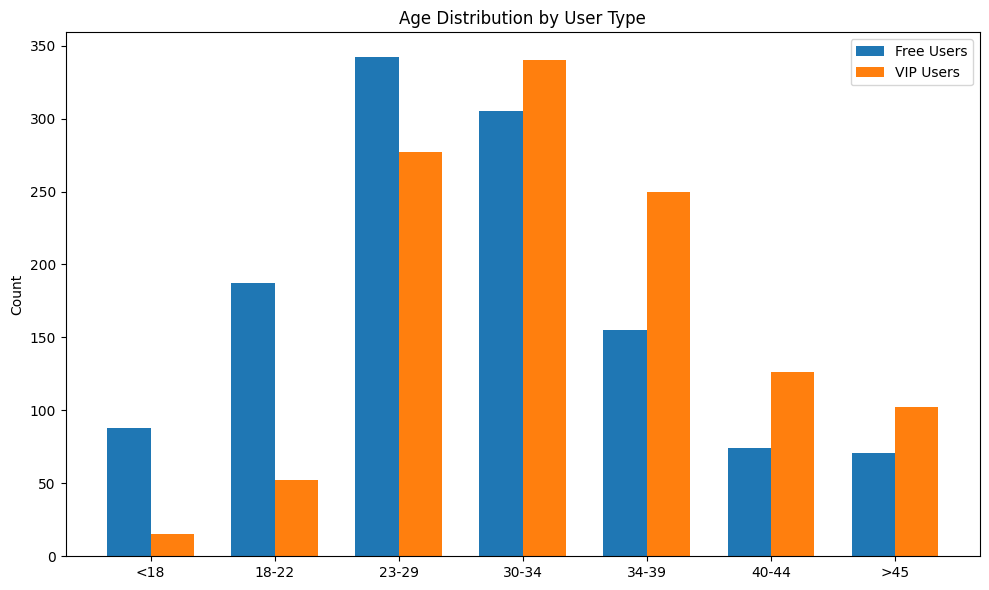

In [81]:
labels = ['<18', '18-22', '23-29', '30-34', '34-39', '40-44', '>45']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, age_bin_free, width, label='Free Users')
rects2 = ax.bar(x + width/2,age_bin_vip, width, label='VIP Users')

ax.set_ylabel('Count')
ax.set_title('Age Distribution by User Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

count    1222.000000
mean       29.660393
std         9.516831
min         0.000000
25%        23.000000
50%        29.000000
75%        34.000000
max       105.000000
Name: Age, dtype: float64

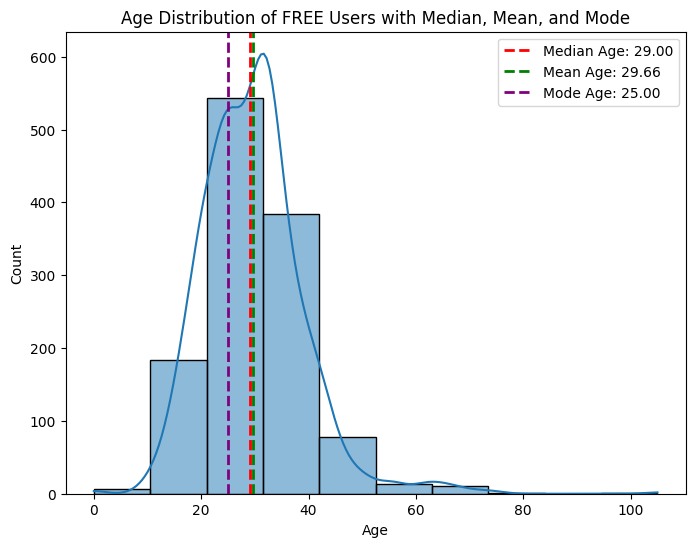

count    1162.000000
mean       33.441480
std         8.460096
min         0.000000
25%        29.000000
50%        33.000000
75%        38.000000
max        85.000000
Name: Age, dtype: float64

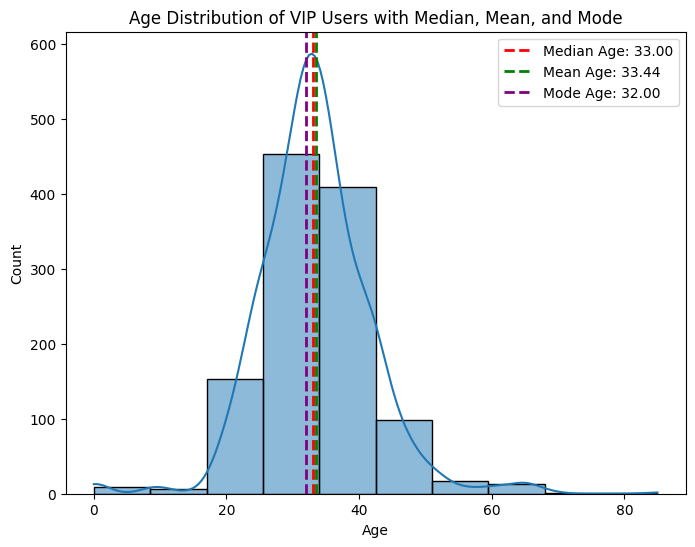

In [82]:
# Calculate age distribution FREE
current_year = pd.to_datetime('now').year
df_user_free_survey['Age'] = current_year - df_user_free_survey['User\nBirthday'].dt.year

# Display basic statistics of age
display(df_user_free_survey['Age'].describe())

# Calculate the median, mean, and mode age for Free Users
median_age_free = df_user_free_survey['Age'].median()
mean_age_free = df_user_free_survey['Age'].mean()
mode_age_free = df_user_free_survey['Age'].mode()[0] # mode() can return multiple values if there's a tie

# Visualize the age distribution with median, mean, and mode lines
plt.figure(figsize=(8, 6))
sns.histplot(df_user_free_survey['Age'].dropna(), bins=10, kde=True)
plt.axvline(median_age_free, color='red', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age_free:.2f}')
plt.axvline(mean_age_free, color='green', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age_free:.2f}')
plt.axvline(mode_age_free, color='purple', linestyle='dashed', linewidth=2, label=f'Mode Age: {mode_age_free:.2f}')

plt.title('Age Distribution of FREE Users with Median, Mean, and Mode')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

# Calculate age distribution VIP
df_user_vip_survey['Age'] = current_year - df_user_vip_survey['User\nBirthday'].dt.year

# Display basic statistics of age
display(df_user_vip_survey['Age'].describe())

# Calculate the median, mean, and mode age for VIP Users
median_age_vip = df_user_vip_survey['Age'].median()
mean_age_vip = df_user_vip_survey['Age'].mean()
mode_age_vip = df_user_vip_survey['Age'].mode()[0] # mode() can return multiple values if there's a tie

# Visualize the age distribution with median, mean, and mode lines
plt.figure(figsize=(8, 6))
sns.histplot(df_user_vip_survey['Age'].dropna(), bins=10, kde=True)
plt.axvline(median_age_vip, color='red', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age_vip:.2f}')
plt.axvline(mean_age_vip, color='green', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age_vip:.2f}')
plt.axvline(mode_age_vip, color='purple', linestyle='dashed', linewidth=2, label=f'Mode Age: {mode_age_vip:.2f}')

plt.title('Age Distribution of VIP Users with Median, Mean, and Mode')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

Bhattacharyya Coefficient is nearly 1, and the distance is nearly 0, which means the two distributions are very similar in terms of distribution shape. Indeed, most users fall in the range of 23-34. There are more VIP users than Free users from the age of 30 onwards, as they have stable income and more willing to pay for VIP services. The opposite trend can be seen for the age group from 29 backward, as they are mostly students with less or no stable income.
The user demographic of both free plan and VIP plan are very similar in terms of age and gender types.

Moreover, from the skewness analysis, for both Free and VIP users' age distributions, we can see that the Mode < Median < Mean. This means that both distributions are right-skewed. This implies that there are mostly 'younger' users, as data mainly concentrated on the left side of the Mean.



# User survey analysis


In [83]:
df_user_free_survey.groupby('User Gender').count()

USER ID  User\nBirthday  Voice Gender  Voice\nRegion  Podcast  \
User Gender                                                                  
0                722             722           722            722      241   
1                465             465           465            465      203   
2                 35              35            35             35       15   

             Tóm tắt sách  Thiếu nhi  Chính trị  Lịch sử  Thiền  ...  \
User Gender                                                      ...   
0                     163         58        200      211    119  ...   
1                     152        100        110      153    122  ...   
2                      10         13          9       14      8  ...   

             Ngôn tình  Trinh thám  Kinh điển  Thơ  Truyện ngắn - Tản văn  \
User Gender                                                                 
0                  251         274        279  151                    284   
1                  231         170        186  122                    254   
2                   11          14         13   11                     18   

             Khoa học viễn tưởng  Light Novel  Truyện ma  LGBT+  Age  
User Gender                                                           
0                            210           74        105     43  722  
1                            145           98        100     57  465  
2                             18            6          9      9   35  

[3 rows x 30 columns]

In [84]:
df_user_free_survey.groupby('Voice\nRegion').count()

USER ID  User\nBirthday  User Gender  Voice Gender  Podcast  \
Voice\nRegion                                                                
39                 567             567          567           567      193   
40                 107             107          107           107       29   
41                 548             548          548           548      237   

               Tóm tắt sách  Thiếu nhi  Chính trị  Lịch sử  Thiền  ...  \
Voice\nRegion                                                      ...   
39                      142         74        168      179    109  ...   
40                       31         16         18       28     18  ...   
41                      152         81        133      171    122  ...   

               Ngôn tình  Trinh thám  Kinh điển  Thơ  Truyện ngắn - Tản văn  \
Voice\nRegion                                                                 
39                   229         193        227  138                    261   
40                    38          48         34   28                     49   
41                   226         217        217  118                    246   

               Khoa học viễn tưởng  Light Novel  Truyện ma  LGBT+  Age  
Voice\nRegion                                                           
39                             179           78         87     42  567  
40                              30           15         17      7  107  
41                             164           85        110     60  548  

[3 rows x 30 columns]

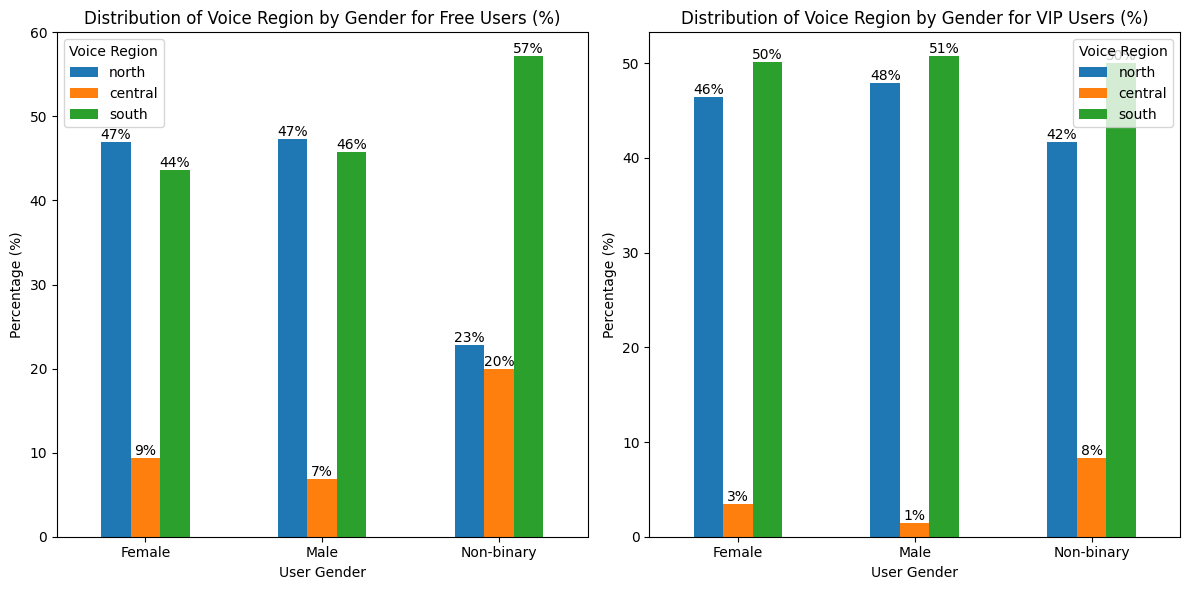

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Calculate percentages for Free Users
gender_region_counts_free = df_user_free_survey.groupby(['User Gender','Voice\nRegion']).size().unstack()
gender_region_percentages_free = gender_region_counts_free.apply(lambda x: x / x.sum() * 100, axis=1)

gender_region_percentages_free.plot(kind='bar', ax=ax1)
ax1.set_title('Distribution of Voice Region by Gender for Free Users (%)')
ax1.set_xlabel('User Gender')
ax1.set_ylabel('Percentage (%)')
ax1.set_xticklabels(['Female', 'Male', 'Non-binary'], rotation=0)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f%%')

# Calculate percentages for VIP Users
gender_region_counts_vip = df_user_vip_survey.groupby(['User Gender','Voice\nRegion']).size().unstack()
gender_region_percentages_vip = gender_region_counts_vip.apply(lambda x: x / x.sum() * 100, axis=1)

gender_region_percentages_vip.plot(kind='bar', ax=ax2)
ax2.set_title('Distribution of Voice Region by Gender for VIP Users (%)')
ax2.set_xlabel('User Gender')
ax2.set_ylabel('Percentage (%)')
ax2.set_xticklabels(['Female', 'Male', 'Non-binary'], rotation=0)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f%%')


# Get the mapping from df_survey_id
region_map = {39: 'north', 40: 'central', 41: 'south'}

# Update legend labels using the mapping
handles, labels = ax1.get_legend_handles_labels()
updated_labels = [region_map[int(label)] for label in labels]
ax1.legend(handles, updated_labels, title='Voice Region')

handles, labels = ax2.get_legend_handles_labels()
updated_labels = [region_map[int(label)] for label in labels]
ax2.legend(handles, updated_labels, title='Voice Region')


plt.tight_layout()
plt.show()

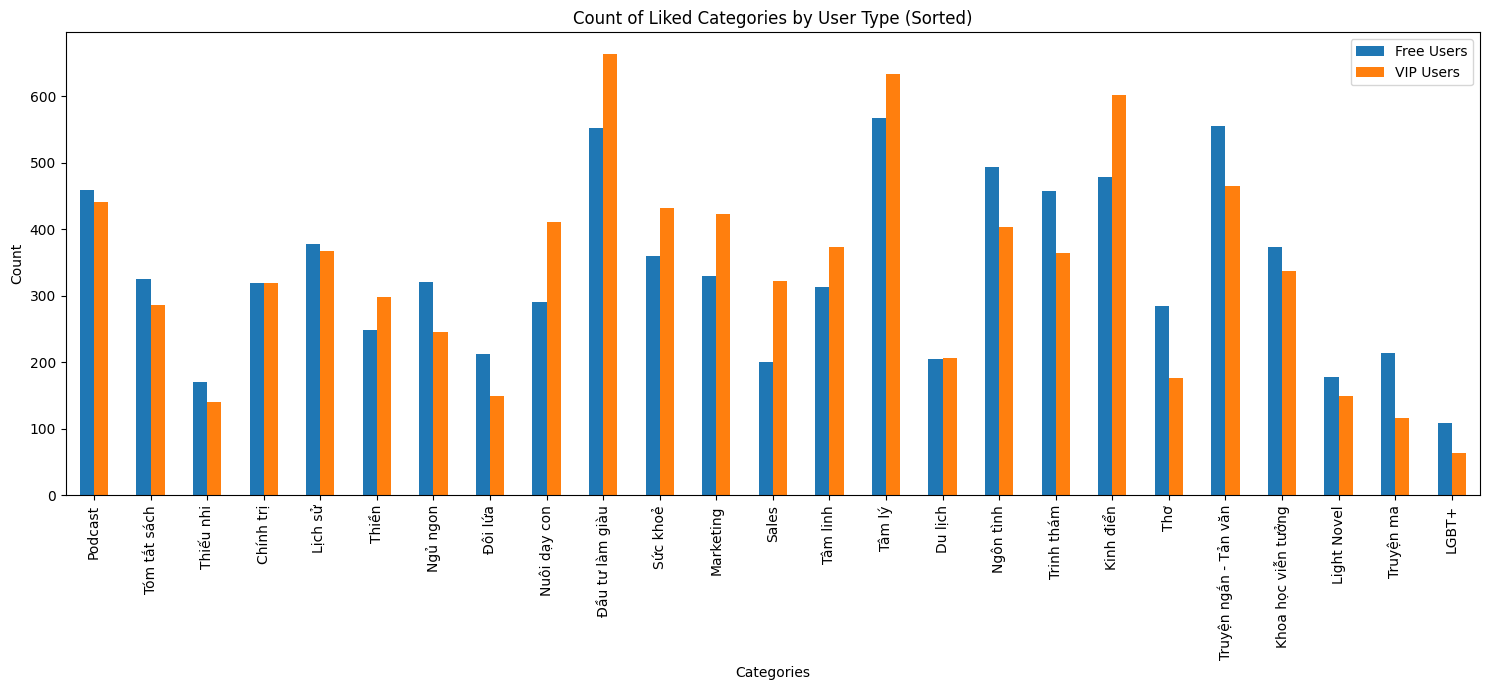

In [86]:
ratio_free = df_user_free_survey[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()
ratio_vip = df_user_vip_survey[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

df_ratios = pd.DataFrame({'Free Users': ratio_free, 'VIP Users': ratio_vip})

# Sort by the sum of Free Users and VIP Users percentages in descending order



df_ratios.plot(kind='bar', figsize=(15, 7))
plt.title('Count of Liked Categories by User Type (Sorted)')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [87]:
top_5_free = ratio_free.nlargest(5)
top_5_vip = ratio_vip.nlargest(5)

print("Top 5 Liked Categories for Free Users:")
display(top_5_free)

print("\nTop 5 Liked Categories for VIP Users:")
display(top_5_vip)

Top 5 Liked Categories for Free Users:


Tâm lý                   568
Truyện ngắn - Tản văn    556
Đầu tư làm giàu          552
Ngôn tình                493
Kinh điển                478
dtype: int64


Top 5 Liked Categories for VIP Users:


Đầu tư làm giàu          663
Tâm lý                   634
Kinh điển                602
Truyện ngắn - Tản văn    465
Podcast                  441
dtype: int64

Đầu tư làm giàu, Tâm lý, Truyện ngắn - Tản văn, Kinh điển are top 4 favorite categories for both plans. Podcast are more favored by VIP user although the like percentages between VIP and free are nearly the same.

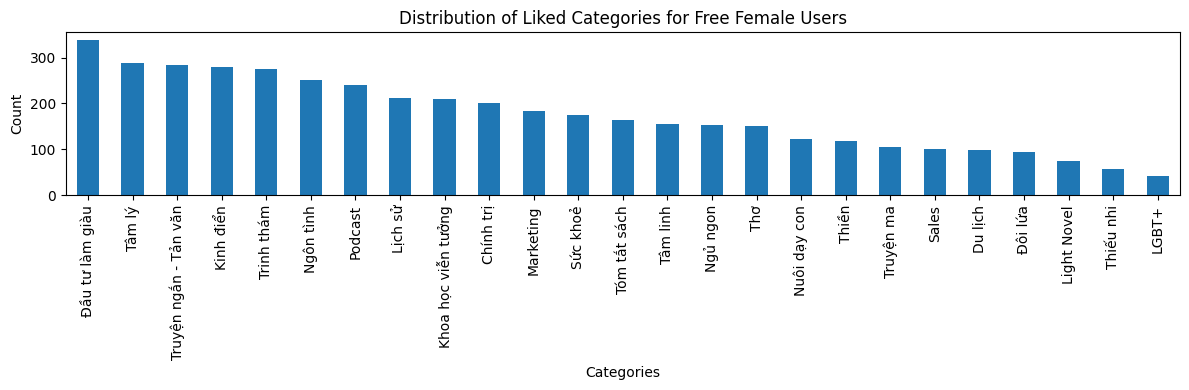

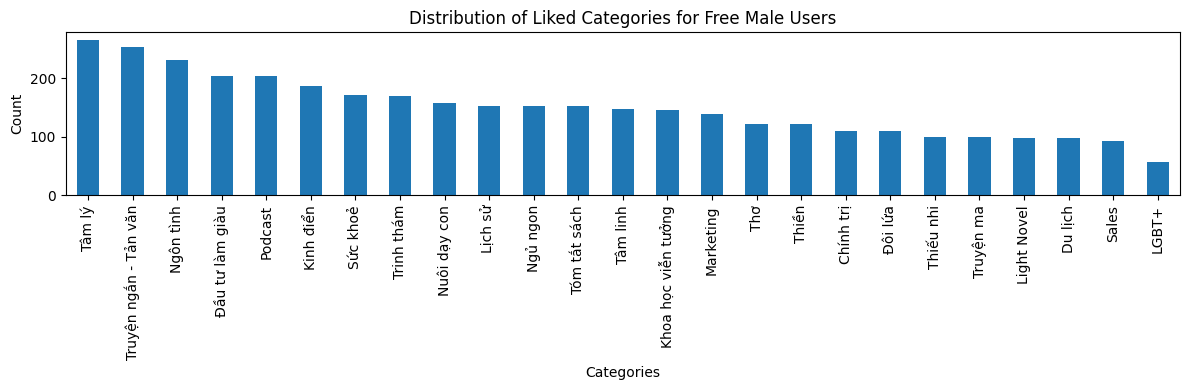

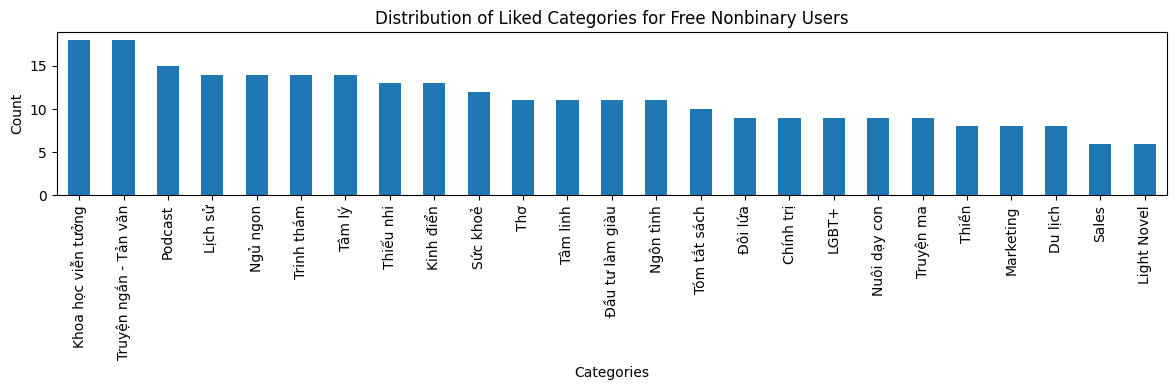

In [88]:
df_free_female = df_user_free_survey[df_user_free_survey['User Gender'] == 0].copy()
df_free_male = df_user_free_survey[df_user_free_survey['User Gender'] == 1].copy()
df_free_nonbinary = df_user_free_survey[df_user_free_survey['User Gender'] == 2].copy()

temp_female = df_free_female[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

temp_male = df_free_male[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

temp_nonbinary = df_free_nonbinary[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

plt.figure(figsize=(12, 4))
temp_female.sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Liked Categories for Free Female Users')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
temp_male.sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Liked Categories for Free Male Users')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
temp_nonbinary.sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Liked Categories for Free Nonbinary Users')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

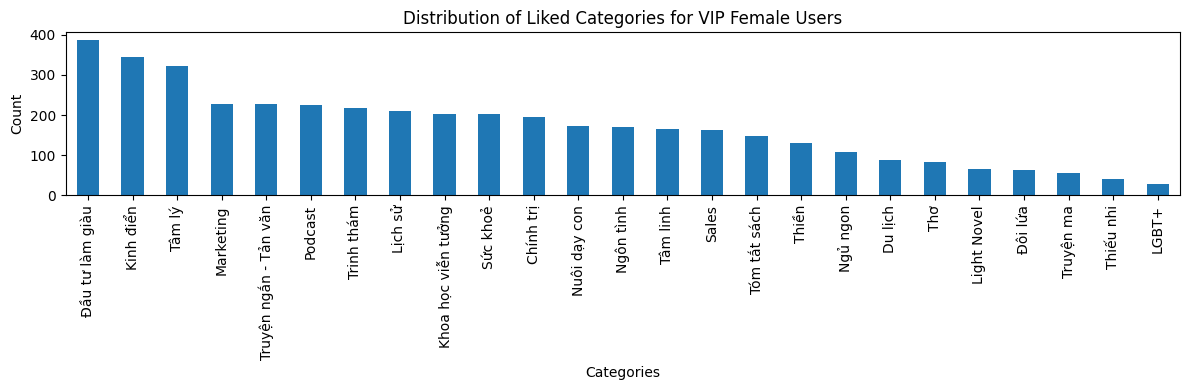

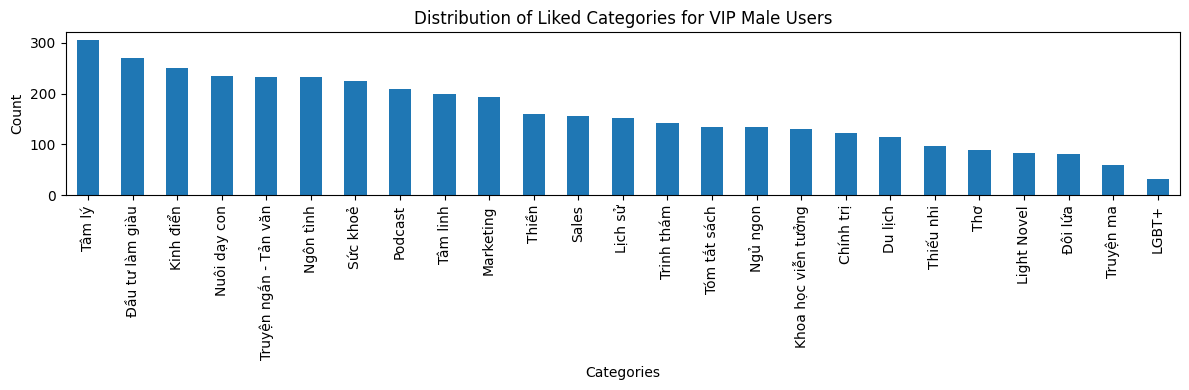

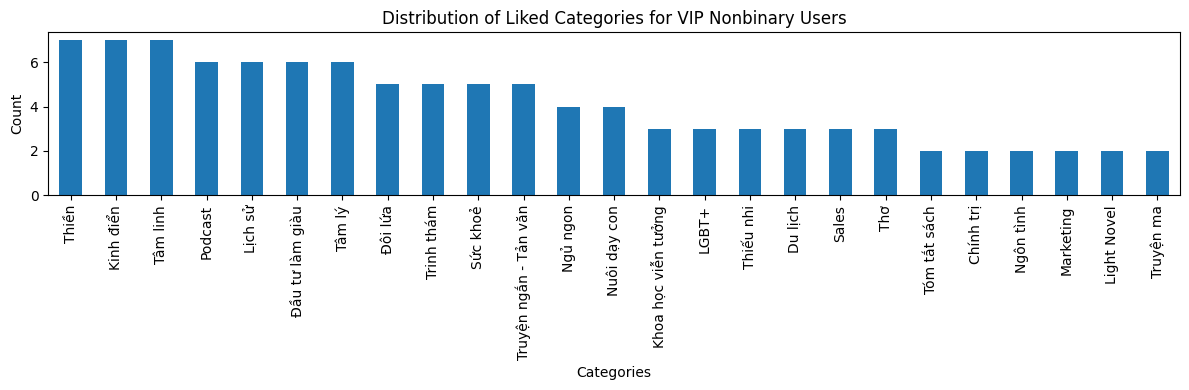

In [89]:
df_vip_female = df_user_vip_survey[df_user_vip_survey['User Gender'] == 0].copy()
df_vip_male = df_user_vip_survey[df_user_vip_survey['User Gender'] == 1].copy()
df_vip_nonbinary = df_user_vip_survey[df_user_vip_survey['User Gender'] == 2].copy()

temp_female = df_vip_female[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

temp_male = df_vip_male[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

temp_nonbinary = df_vip_nonbinary[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()


plt.figure(figsize=(12, 4))
temp_female.sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Liked Categories for VIP Female Users')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
temp_male.sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Liked Categories for VIP Male Users')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
temp_nonbinary.sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Liked Categories for VIP Nonbinary Users')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Now we analyze the user survey based on age-group to understand what contents they prefer. In order to do this, we first need to indentify which customer belongs to which age group by defining a function to assign a label to each of them. Eventually, we add one additional "Age group" column to the dataframe.

In [90]:
# Create age groups of users

def age_bin_distribution(age_column):
    count_array = np.zeros(len(age_column))
    for age in range(len(age_column)):
      if age_column[age] < 18:
        count_array[age] += 1
      elif 18 <=age_column[age] <= 22:
        count_array[age] += 2
      elif 23 <= age_column[age] < 30:
        count_array[age] += 3
      elif 30 <=age_column[age] <= 34:
        count_array[age] += 4
      elif 34 <age_column[age] <= 39:
        count_array[age] += 5
      elif 40 <=age_column[age] < 44:
        count_array[age] += 6
      else:
        count_array[age] += 7
    return count_array

age_bin_free = age_bin_distribution(df_user_free_survey['Age'])
age_bin_vip = age_bin_distribution(df_user_vip_survey['Age'])

df_user_free_survey['Age group']=age_bin_free
df_user_vip_survey['Age group']=age_bin_vip


Top 10 Liked Categories by Age Group for Free Users:


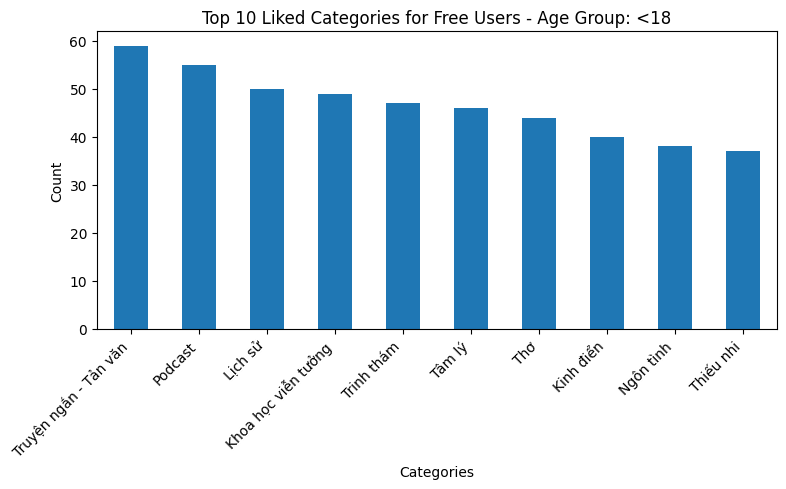

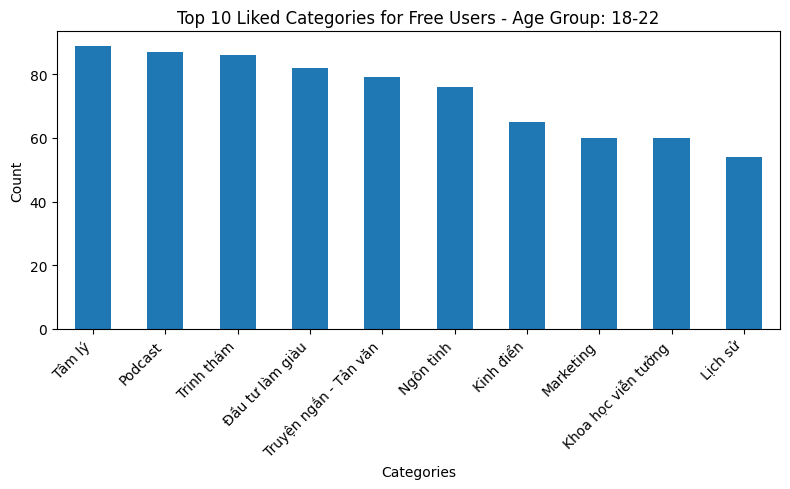

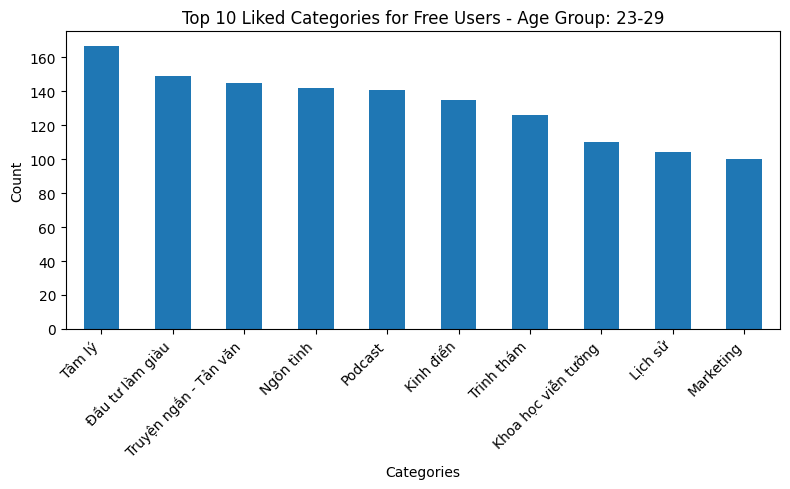

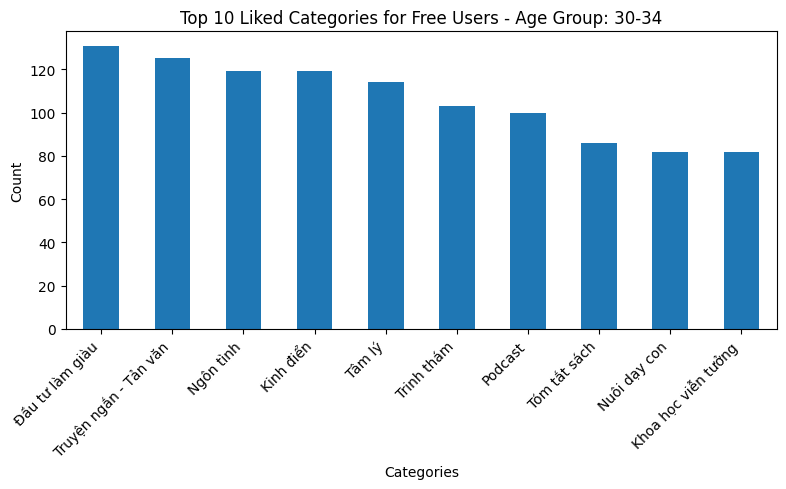

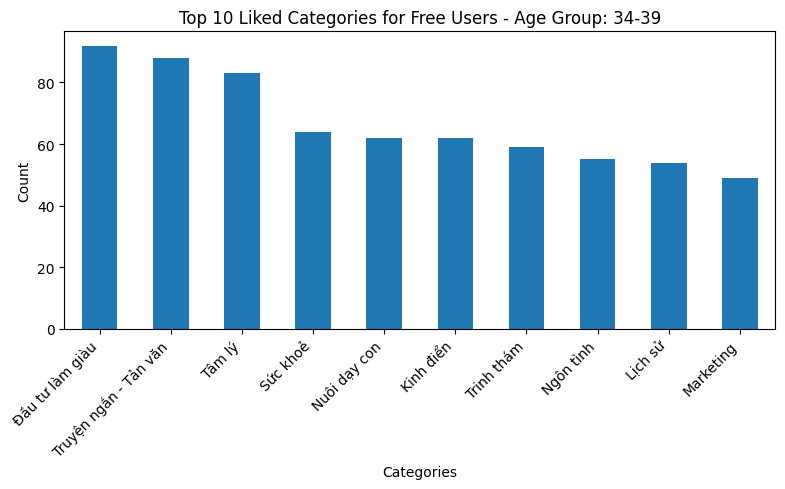

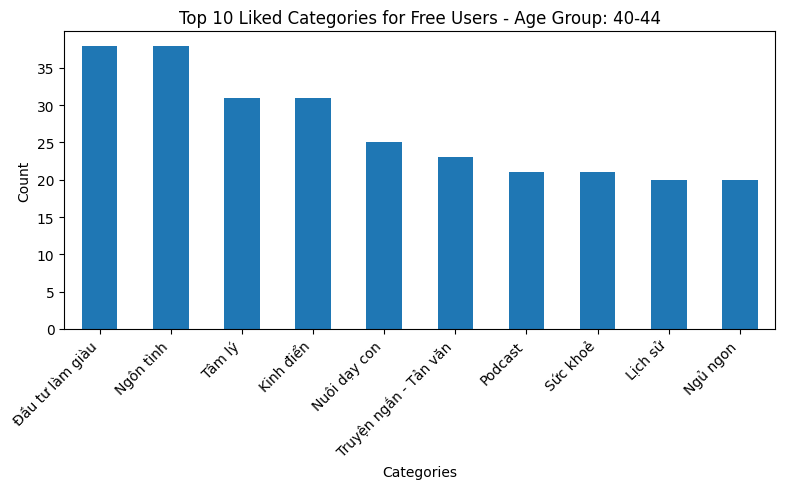

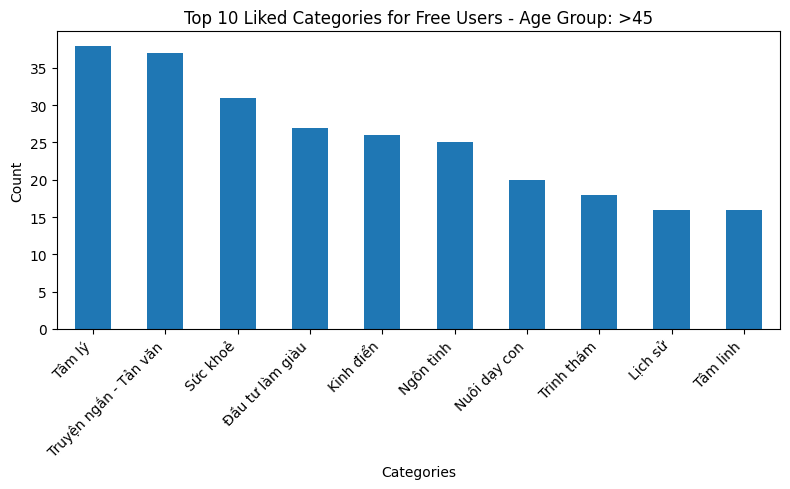

In [91]:
info_age_group_free = df_user_free_survey.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

age_group_labels = ['<18', '18-22', '23-29', '30-34', '34-39', '40-44', '>45']

print("Top 10 Liked Categories by Age Group for Free Users:")
for i, age_group_data in info_age_group_free.iterrows():
    #print(i, age_group_data)
    top_5_categories = age_group_data.nlargest(10)
    plt.figure(figsize=(8, 5))
    top_5_categories.plot(kind='bar')
    plt.title(f'Top 10 Liked Categories for Free Users - Age Group: {age_group_labels[int(i)-1]}')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Top 10 Liked Categories by Age Group for VIP Users:


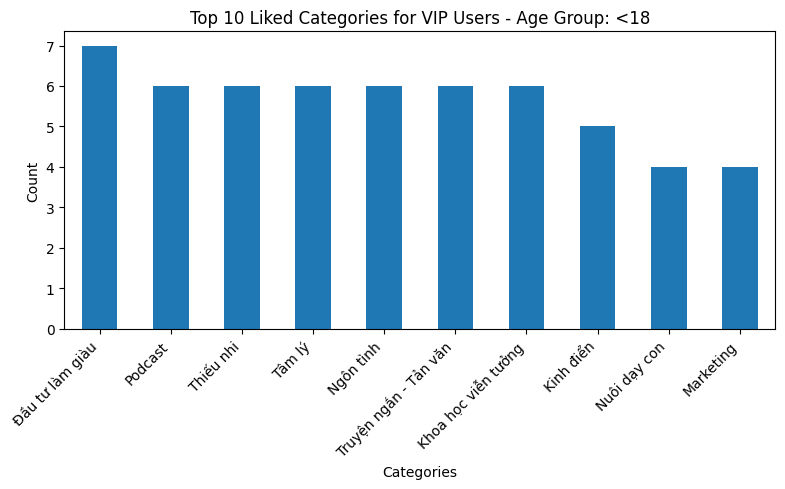

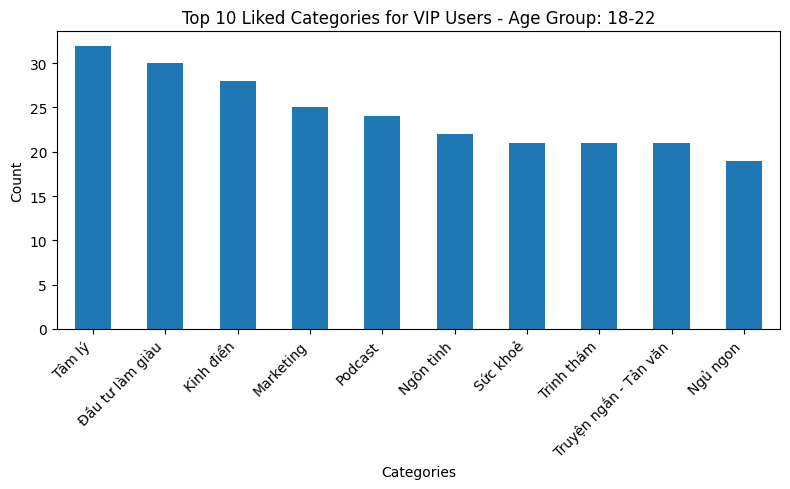

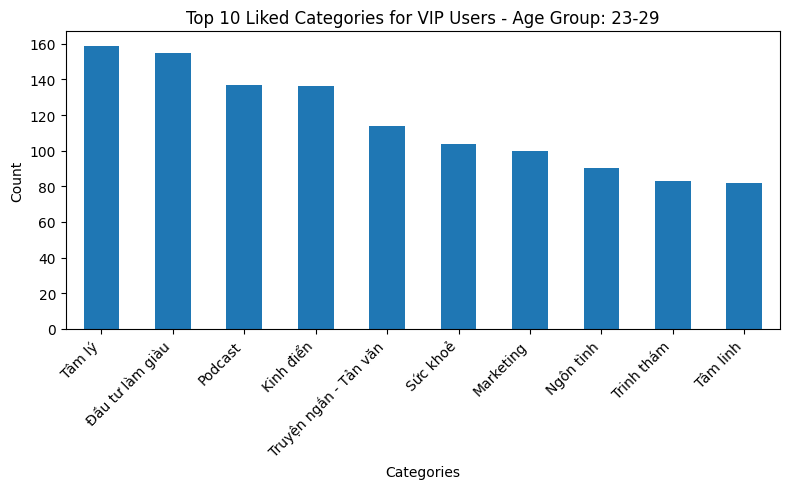

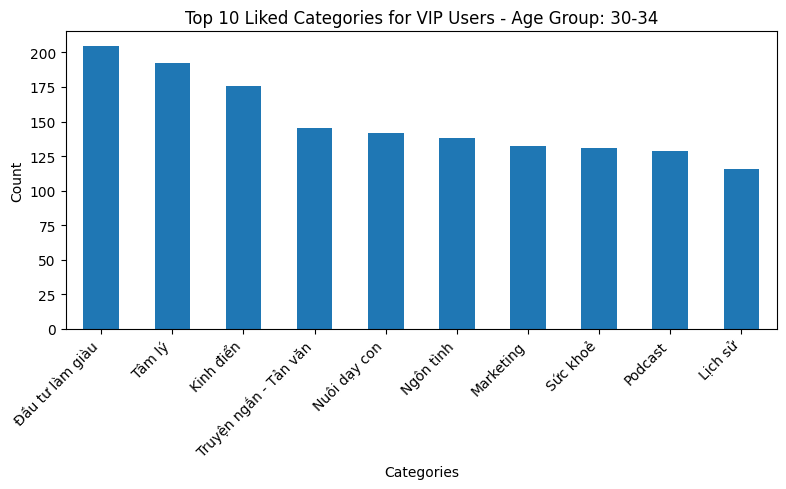

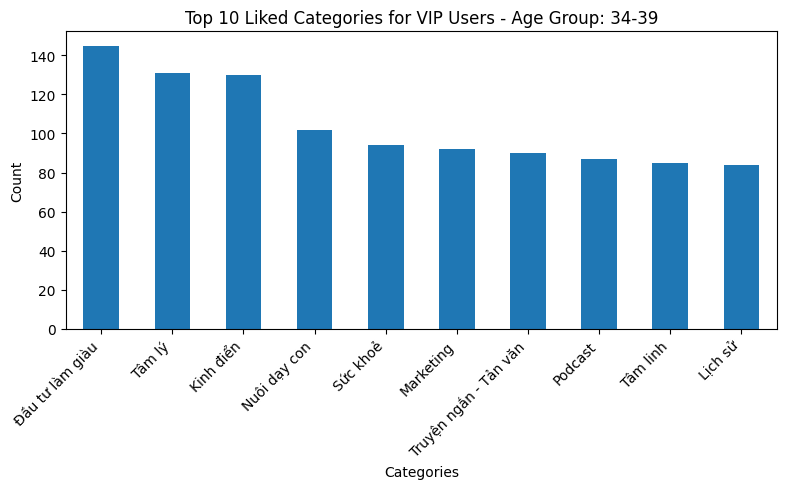

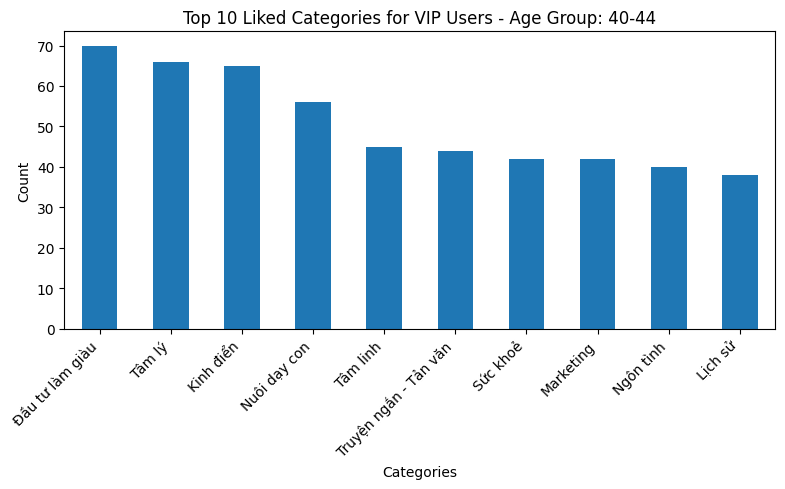

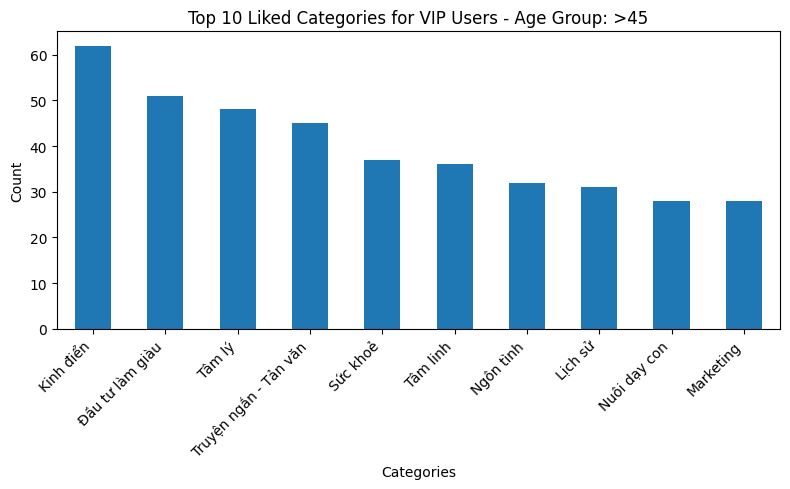

In [92]:
info_age_group_vip = df_user_vip_survey.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

age_group_labels = ['<18', '18-22', '23-29', '30-34', '34-39', '40-44', '>45']

print("Top 10 Liked Categories by Age Group for VIP Users:")
for i, age_group_data in info_age_group_vip.iterrows():
    top_5_categories = age_group_data.nlargest(10)
    plt.figure(figsize=(8, 5))
    top_5_categories.plot(kind='bar')
    plt.title(f'Top 10 Liked Categories for VIP Users - Age Group: {age_group_labels[int(i)-1]}')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

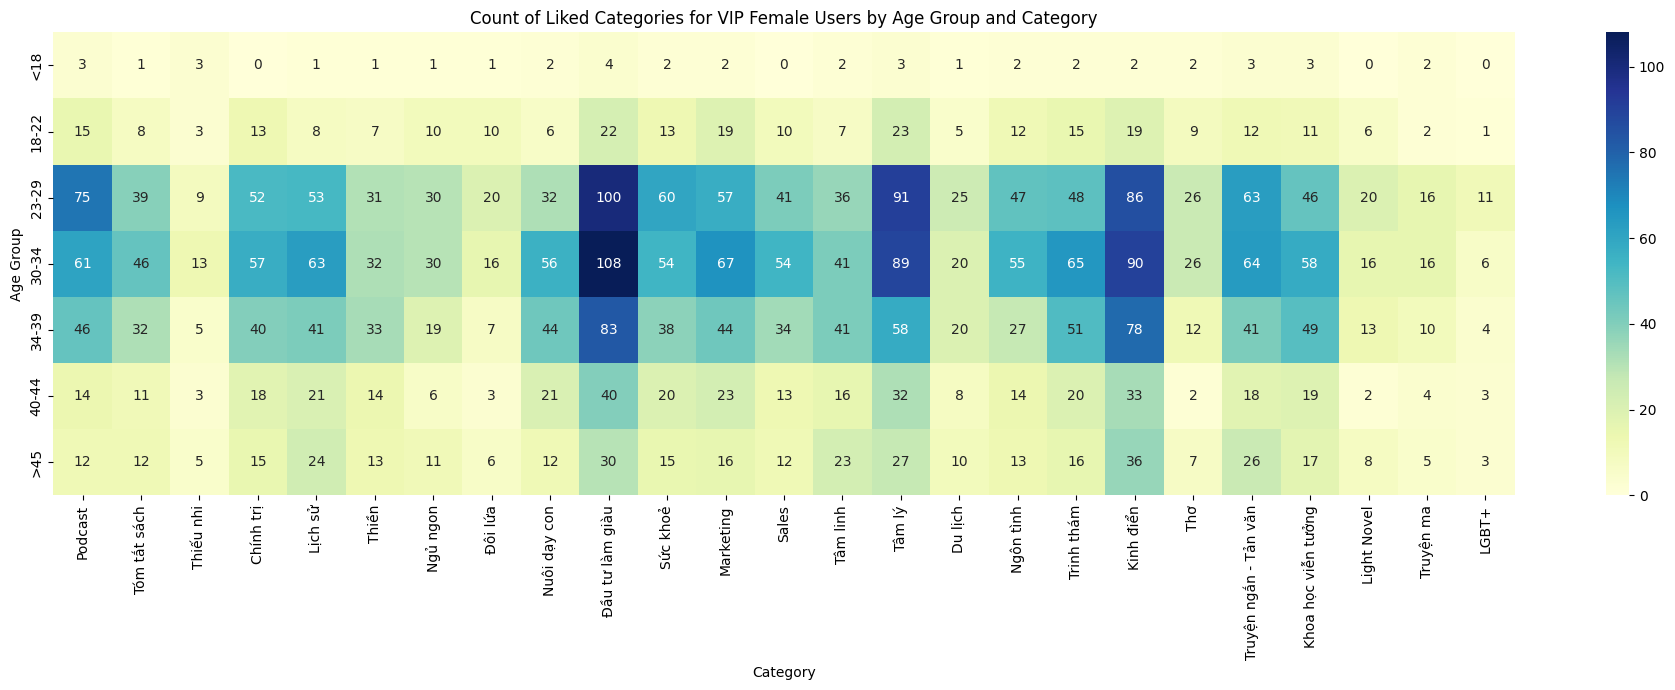

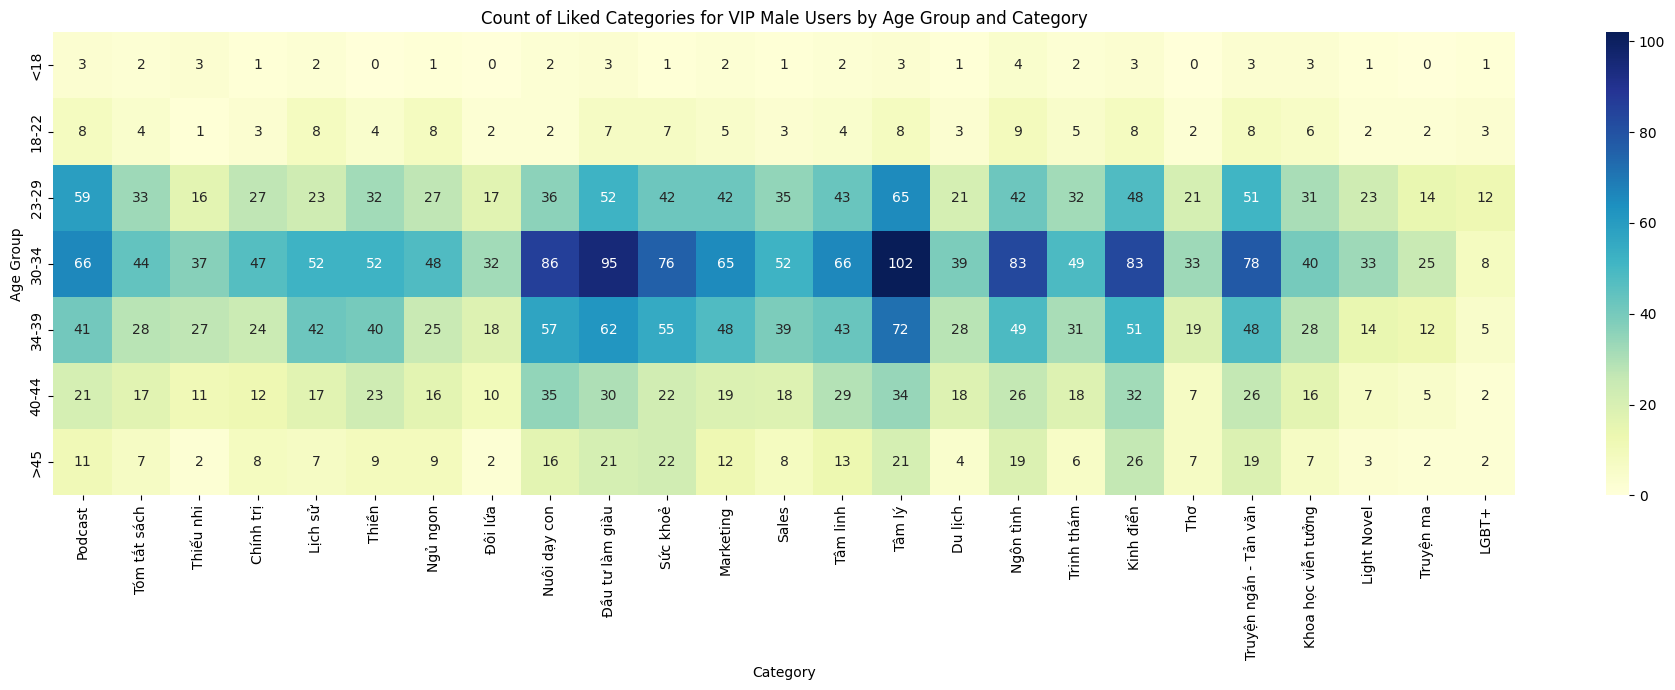

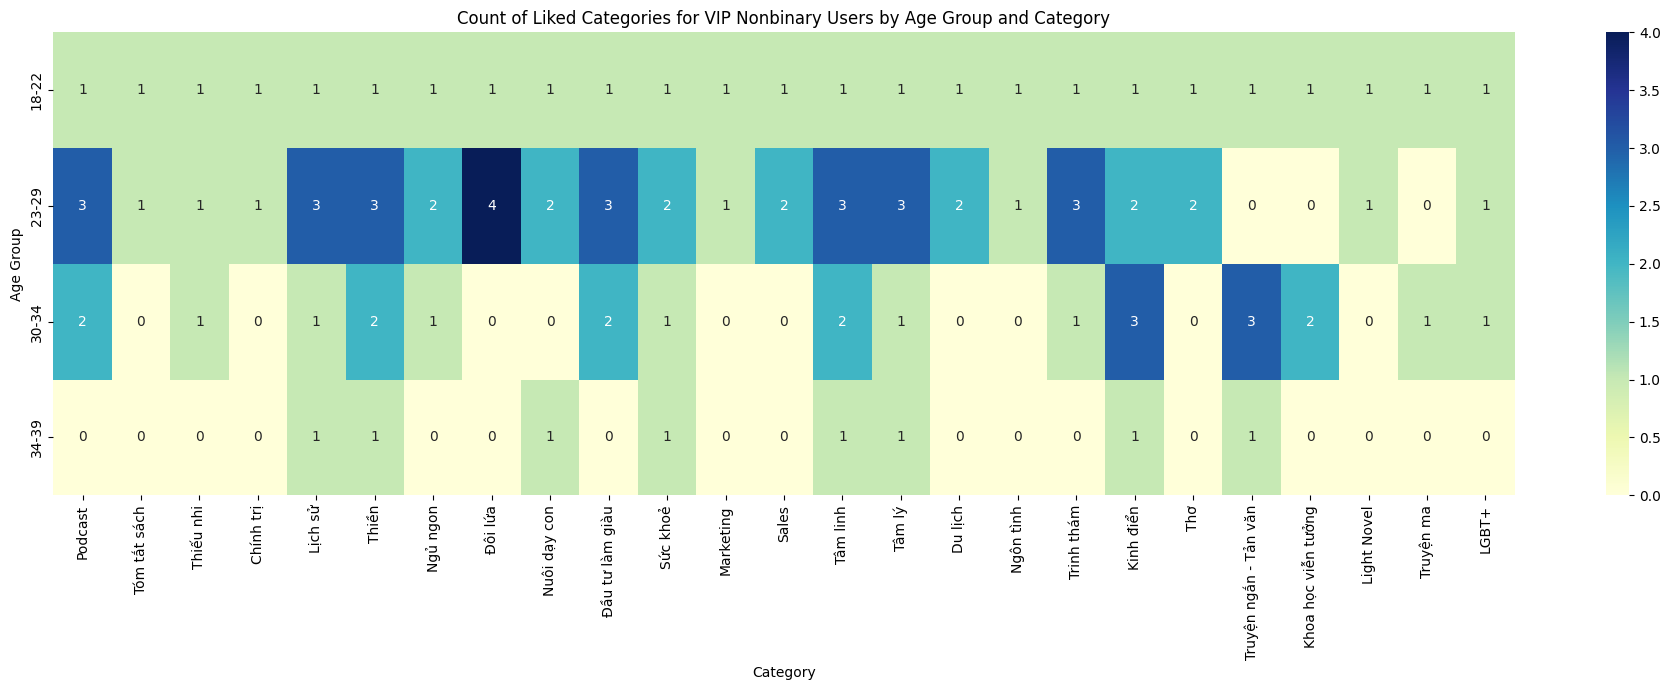

In [93]:
df_vip_female = df_user_vip_survey[df_user_vip_survey['User Gender'] == 0].copy()
temp_fem_by_age_group=df_vip_female.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

age_group_labels_dict = {1.0: '<18', 2.0: '18-22', 3.0: '23-29', 4.0: '30-34', 5.0: '34-39', 6.0: '40-44', 7.0: '>45'}
temp_fem_by_age_group = temp_fem_by_age_group.rename(index=age_group_labels_dict)

plt.figure(figsize=(19, 7))
sns.heatmap(temp_fem_by_age_group, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Count of Liked Categories for VIP Female Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df_vip_male = df_user_vip_survey[df_user_vip_survey['User Gender'] == 1].copy()
temp_male_by_age_group=df_vip_male.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

age_group_labels_dict = {1.0: '<18', 2.0: '18-22', 3.0: '23-29', 4.0: '30-34', 5.0: '34-39', 6.0: '40-44', 7.0: '>45'}
temp_male_by_age_group = temp_male_by_age_group.rename(index=age_group_labels_dict)

plt.figure(figsize=(19, 7))
sns.heatmap(temp_male_by_age_group, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Count of Liked Categories for VIP Male Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df_vip_nonbinary = df_user_vip_survey[df_user_vip_survey['User Gender'] == 2].copy()
temp_nonbinary_by_age_group=df_vip_nonbinary.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

temp_nonbinary_by_age_group = temp_nonbinary_by_age_group.rename(index=age_group_labels_dict)

plt.figure(figsize=(19, 7))
sns.heatmap(temp_nonbinary_by_age_group, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Count of Liked Categories for VIP Nonbinary Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

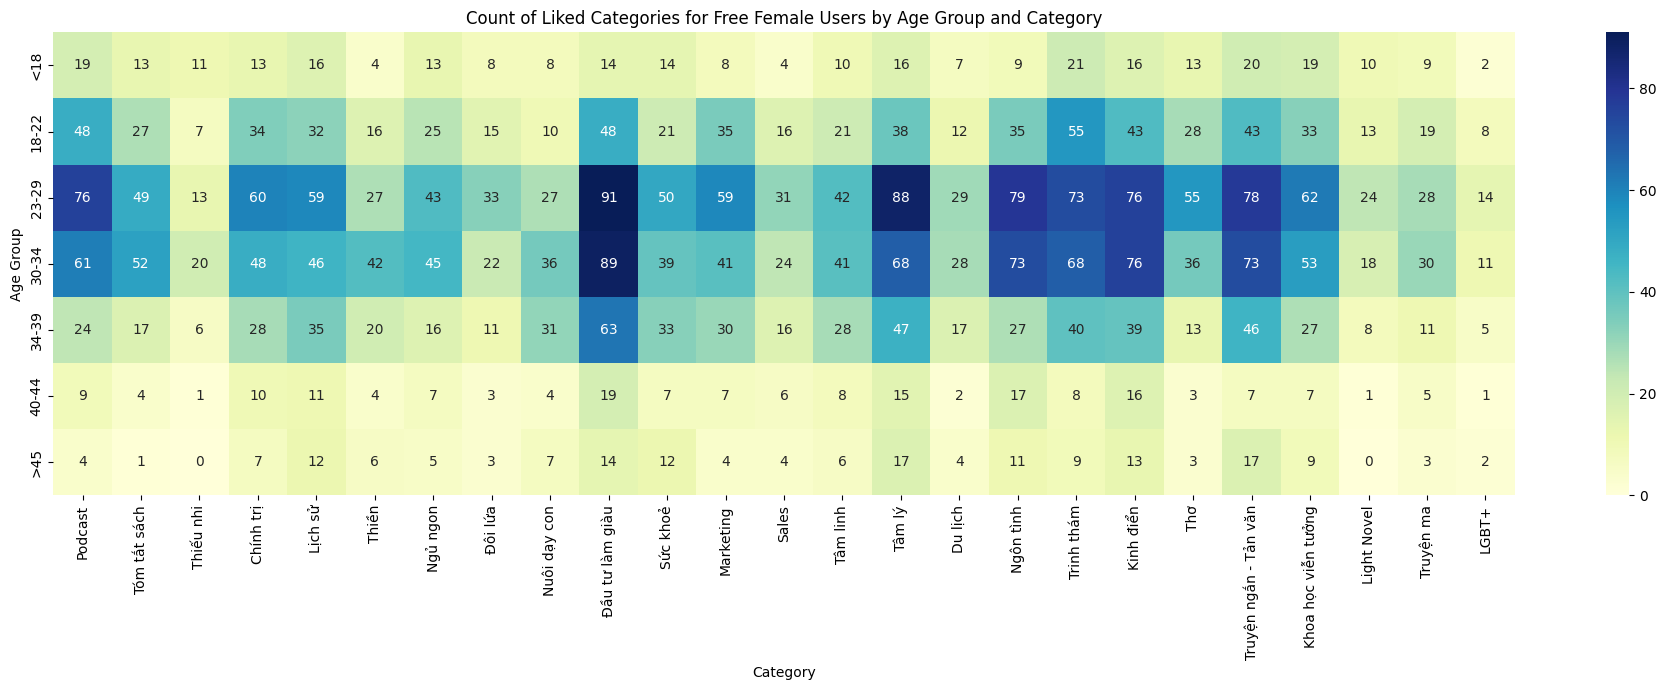

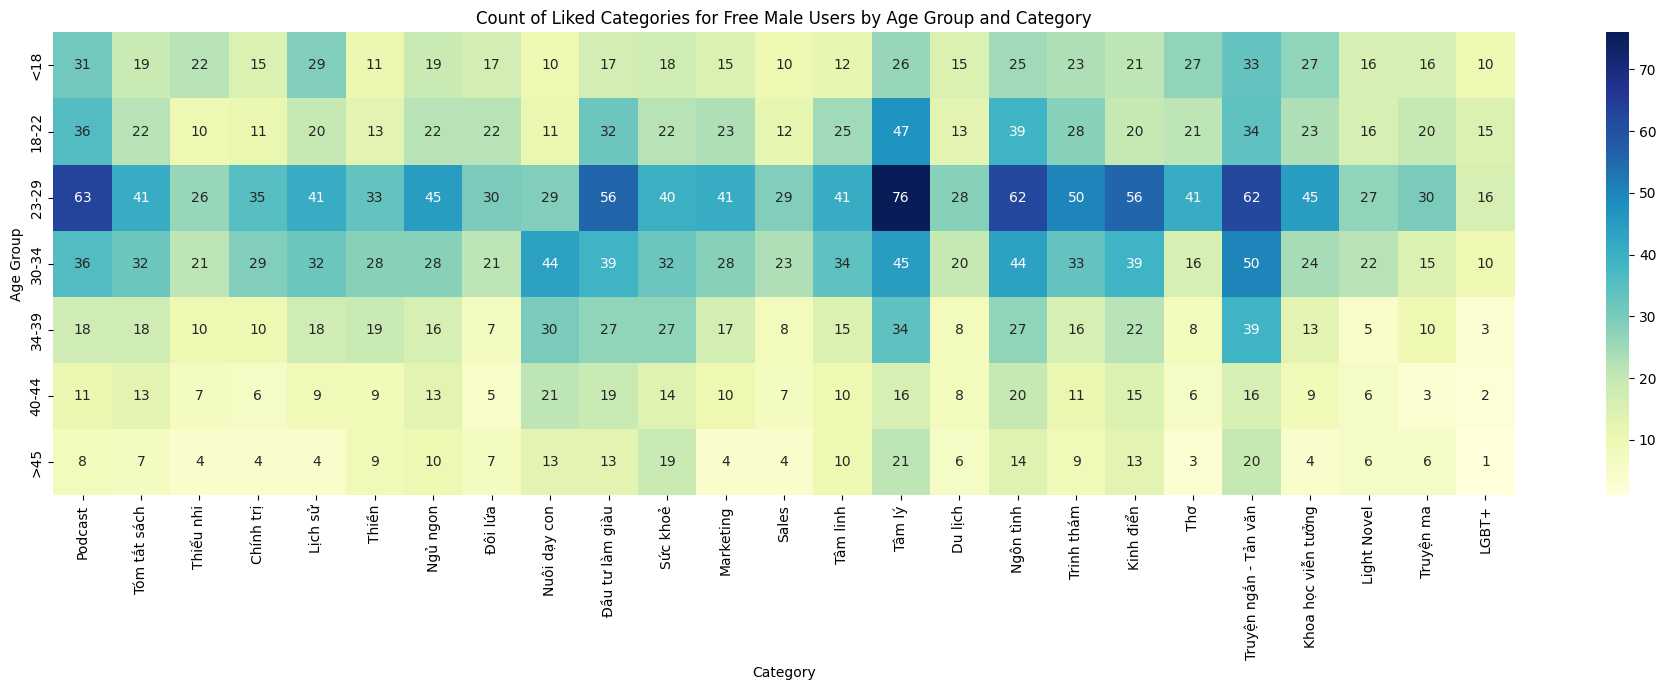

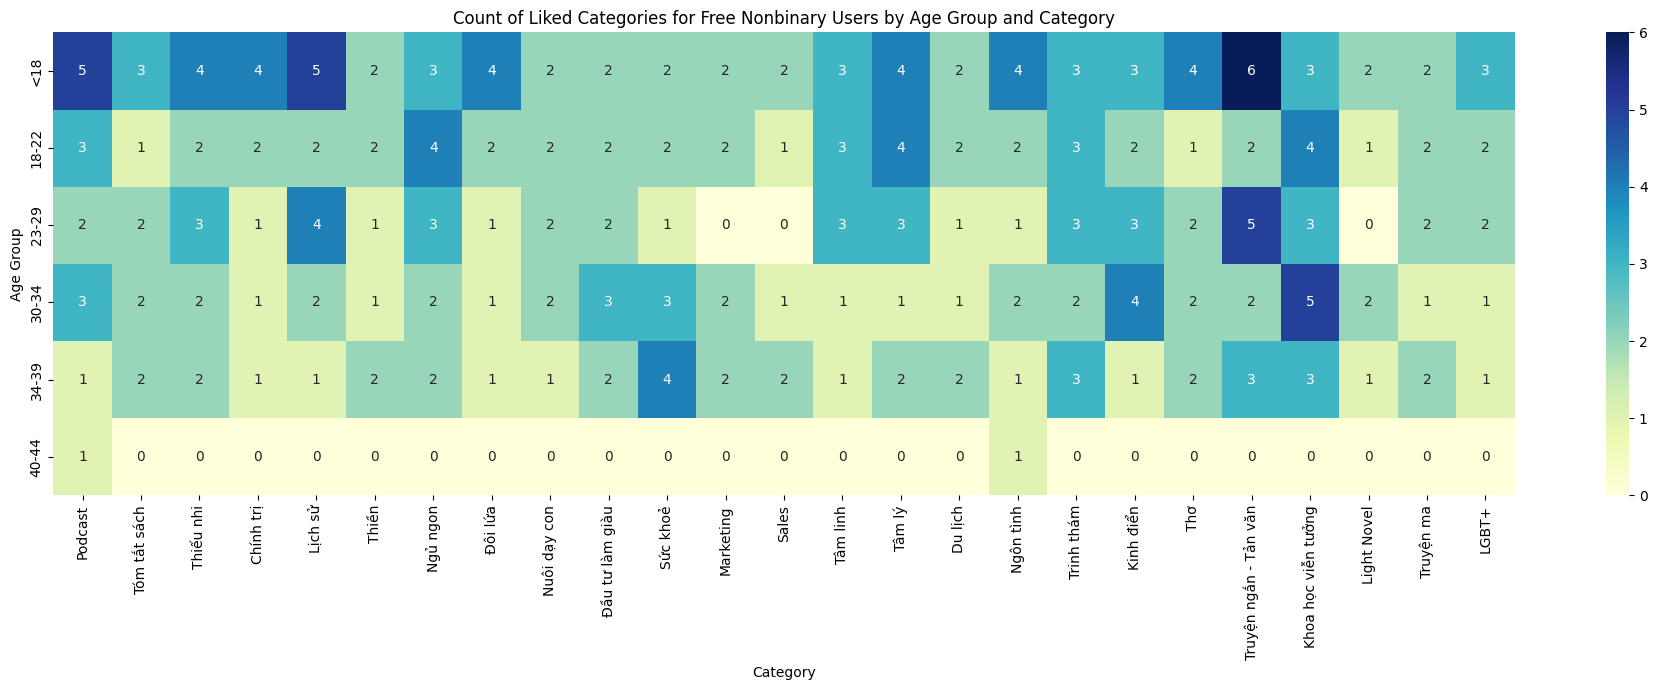

In [94]:
df_free_female = df_user_free_survey[df_user_free_survey['User Gender'] == 0].copy()
temp_fem_by_age_group=df_free_female.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

age_group_labels_dict = {1.0: '<18', 2.0: '18-22', 3.0: '23-29', 4.0: '30-34', 5.0: '34-39', 6.0: '40-44', 7.0: '>45'}
temp_fem_by_age_group = temp_fem_by_age_group.rename(index=age_group_labels_dict)

plt.figure(figsize=(19, 7))
sns.heatmap(temp_fem_by_age_group, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Count of Liked Categories for Free Female Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df_free_male = df_user_free_survey[df_user_free_survey['User Gender'] == 1].copy()
temp_male_by_age_group=df_free_male.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

age_group_labels_dict = {1.0: '<18', 2.0: '18-22', 3.0: '23-29', 4.0: '30-34', 5.0: '34-39', 6.0: '40-44', 7.0: '>45'}
temp_male_by_age_group = temp_male_by_age_group.rename(index=age_group_labels_dict)

plt.figure(figsize=(19, 7))
sns.heatmap(temp_male_by_age_group, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Count of Liked Categories for Free Male Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df_free_nonbinary = df_user_free_survey[df_user_free_survey['User Gender'] == 2].copy()
temp_nonbinary_by_age_group=df_free_nonbinary.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

temp_nonbinary_by_age_group = temp_nonbinary_by_age_group.rename(index=age_group_labels_dict)

plt.figure(figsize=(19, 7))
sns.heatmap(temp_nonbinary_by_age_group, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Count of Liked Categories for Free Nonbinary Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**User Survey Analysis**

Age Distribution:

1.   The age distribution for both Free and VIP users shows that most users are
between 23 and 34 years old.
2.   VIP users tend to be slightly older on average than Free users, with more VIP users in the 30+ age groups. This could be attributed to having a more stable income.
3. Outlier analysis showed a small percentage of outliers in the age distribution for both user types (around 3.6%). The Bhattacharyya distance confirmed that the age distributions of Free and VIP users are very similar. This confirms the fact that User acquisition target is set according to the demography của paid user.


Gender Distribution:

For both Free and VIP users based on the available, the majority identify as Female, followed by Male, and a small percentage as Non-binary. However, from the background information that the app actually has more male users than female users, this means that **female users actually more active in answering the app's survey than the male counterpart**.


Voice Region Distribution:

Both Free and VIP users show a preference for the "North" and "South" voice regions, with the "Central" region being less popular. This pattern is consistent across both Free and VIP users, and also across different genders within each user type.

Liked Categories:
1. The top 4 liked categories for both Free and VIP users are "Đầu tư làm giàu", "Tâm lý", "Truyện ngắn - Tản văn", and "Kinh điển".
2. "Podcast" is more favored by VIP users, although the percentage of likes is similar between both groups.

Key Insights:

1. The user base for both Free and VIP plans is quite similar in terms of age and gender demographics.
2. The preference for voice regions is consistent across user types and genders.
3. There is a strong overlap in preferred content categories between Free and VIP users, with "Đầu tư làm giàu", "Tâm lý", "Truyện ngắn - Tản văn", and "Kinh điển" being universally popular.
4. While overall category preferences are similar, there are subtle differences when looking at specific age groups and user types, suggesting opportunities for targeted content recommendations.

# Analysis of User listening behavior

In [95]:
df_mapping = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Final-TP-dataset-input.xlsx')
df_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category tầng 2  66 non-null     object
 1   Classify         53 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


There are 13 categories that are not available in the survey.

In [96]:
print(df_user_free_listenings['USER ID'].nunique())
print(df_user_vip_listenings['USER ID'].nunique())

828
1108


There are 828 Free users and 1108 VIP users in two listening dataframes. Now we need to merge these two with the survey dataframes

In [97]:
merged_free_data = pd.merge(df_user_free_listenings, df_user_free_survey, on='USER ID', how='left')
merged_vip_data = pd.merge(df_user_vip_listenings, df_user_vip_survey, on='USER ID', how='left')
display(merged_free_data.head())

USER ID  audio_id  duration User\nBirthday  User Gender  Voice Gender  \
0  2524226     12723       546     2009-01-01            1            37   
1  2524226     12724       268     2009-01-01            1            37   
2  2524226     27489       685     2009-01-01            1            37   
3  2524226     27490       118     2009-01-01            1            37   
4  2524226     27491       705     2009-01-01            1            37   

   Voice\nRegion  Podcast  Tóm tắt sách  Thiếu nhi  ...  Trinh thám  \
0             39      NaN           NaN       44.0  ...        55.0   
1             39      NaN           NaN       44.0  ...        55.0   
2             39      NaN           NaN       44.0  ...        55.0   
3             39      NaN           NaN       44.0  ...        55.0   
4             39      NaN           NaN       44.0  ...        55.0   

   Kinh điển   Thơ  Truyện ngắn - Tản văn  Khoa học viễn tưởng  Light Novel  \
0       56.0  57.0                    NaN                  NaN          NaN   
1       56.0  57.0                    NaN                  NaN          NaN   
2       56.0  57.0                    NaN                  NaN          NaN   
3       56.0  57.0                    NaN                  NaN          NaN   
4       56.0  57.0                    NaN                  NaN          NaN   

   Truyện ma  LGBT+  Age  Age group  
0        NaN    NaN   16        1.0  
1        NaN    NaN   16        1.0  
2        NaN    NaN   16        1.0  
3        NaN    NaN   16        1.0  
4        NaN    NaN   16        1.0  

[5 rows x 34 columns]

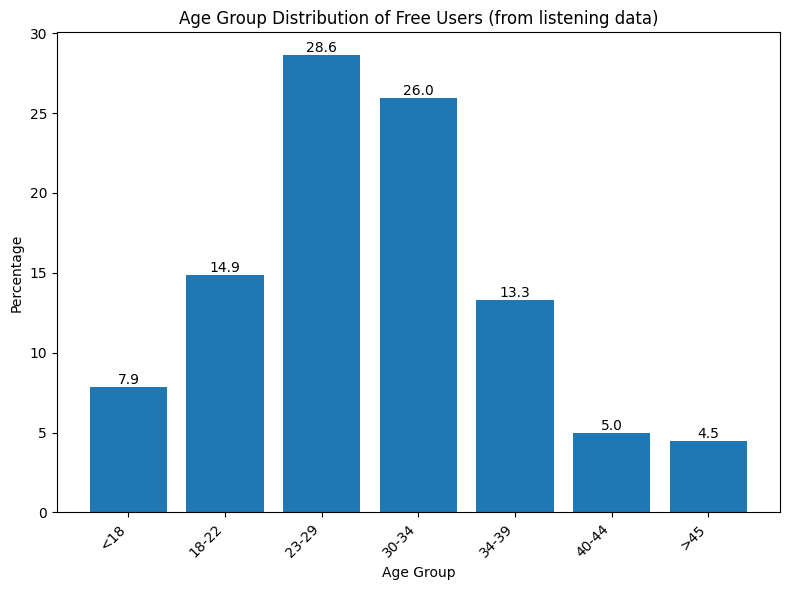

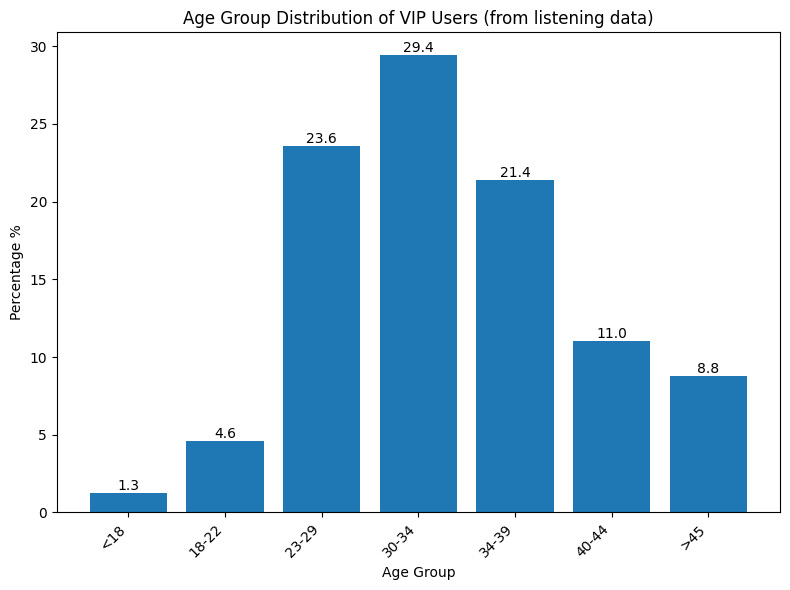

In [98]:
temp_free_user_listening = merged_free_data[['USER ID','Age group']].drop_duplicates()
free_age_group_counts = temp_free_user_listening['Age group'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 6))
ax1 = plt.bar(free_age_group_counts.index, free_age_group_counts.values * 100)
plt.title('Age Group Distribution of Free Users (from listening data)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=age_group_labels, rotation=45, ha='right')
for bar in ax1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', va='bottom', ha='center')
plt.tight_layout()
plt.show()

temp_vip_user_listening = merged_vip_data[['USER ID','Age group']].drop_duplicates()
vip_age_group_counts = temp_vip_user_listening['Age group'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 6))
ax2 = plt.bar(vip_age_group_counts.index, vip_age_group_counts.values * 100)
plt.title('Age Group Distribution of VIP Users (from listening data)')
plt.xlabel('Age Group')
plt.ylabel('Percentage %')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=age_group_labels, rotation=45, ha='right')
for bar in ax2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', va='bottom', ha='center')
plt.tight_layout()
plt.show()

In [99]:
# Merge user listening table with survey table to map the categories they are listening to, based on audio_id
merge_meta_playlist= pd.merge(df_playlist, df_mapping, on='Category tầng 2', how='left')

# Change column name to match
merge_meta_playlist = merge_meta_playlist.rename(columns={
    "Audio ID": "audio_id"
})

merged_free_data_meta= pd.merge(merged_free_data,merge_meta_playlist,on='audio_id', how='left')
merged_vip_data_meta= pd.merge(merged_vip_data,merge_meta_playlist,on='audio_id', how='left')


As there are 13 categories that are not available in the survey, they will be denoted as "Other" when merging the listening table with the user survey table, based on users' IDs.

/tmp/ipython-input-2654256291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listening_time_by_cate_free["Classify"] = listening_time_by_cate_free["Classify"].fillna('Other')
/tmp/ipython-input-2654256291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listening_time_by_cate_vip["Classify"] = listening_time_by_cate_vip["Classify"].fillna('Other')


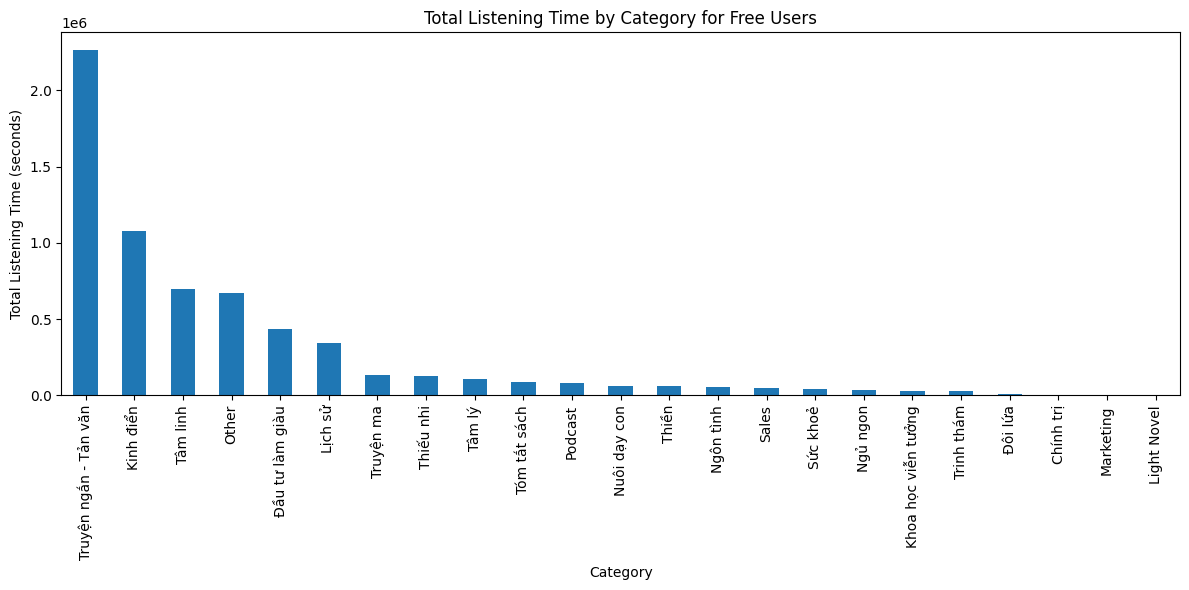

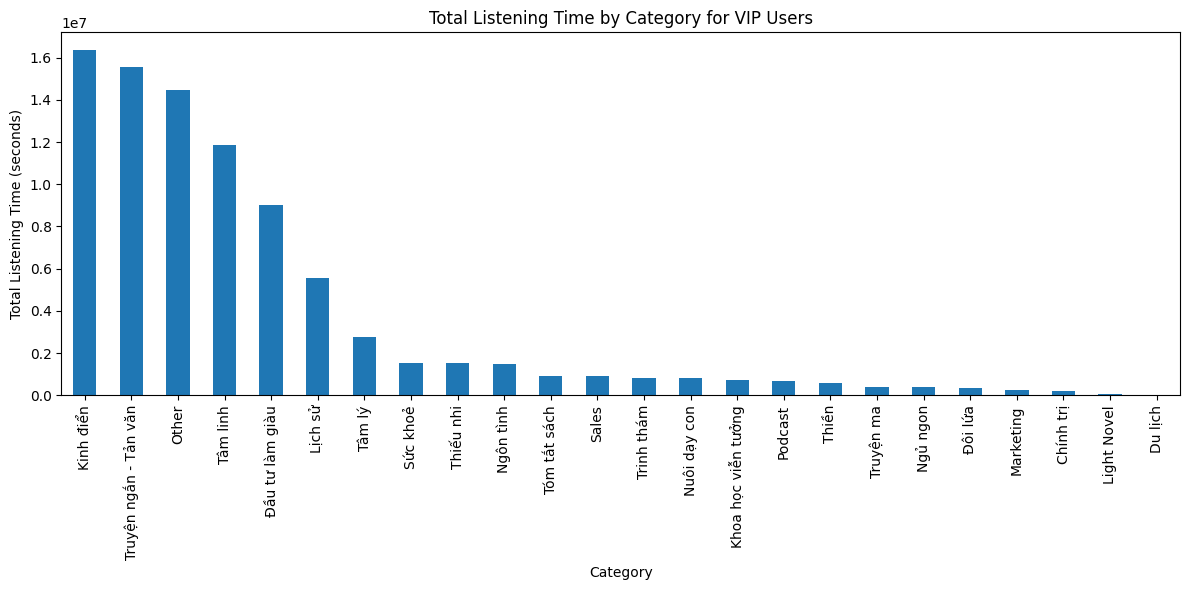

In [100]:
# Analyze
listening_time_by_cate_free = merged_free_data_meta[['USER ID','User Gender','duration','Age group','Classify']]
listening_time_by_cate_free["Classify"] = listening_time_by_cate_free["Classify"].fillna('Other')

listening_time_by_cate_vip = merged_vip_data_meta[['USER ID','User Gender','duration','Age group','Classify']]
listening_time_by_cate_vip["Classify"] = listening_time_by_cate_vip["Classify"].fillna('Other')

sum_listening_time_free = listening_time_by_cate_free.groupby('Classify')['duration'].sum().sort_values(ascending=False)
sum_listening_time_vip = listening_time_by_cate_vip.groupby('Classify')['duration'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sum_listening_time_free.plot(kind='bar')
plt.title('Total Listening Time by Category for Free Users')
plt.xlabel('Category')
plt.ylabel('Total Listening Time (seconds)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sum_listening_time_vip.plot(kind='bar')
plt.title('Total Listening Time by Category for VIP Users')
plt.xlabel('Category')
plt.ylabel('Total Listening Time (seconds)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

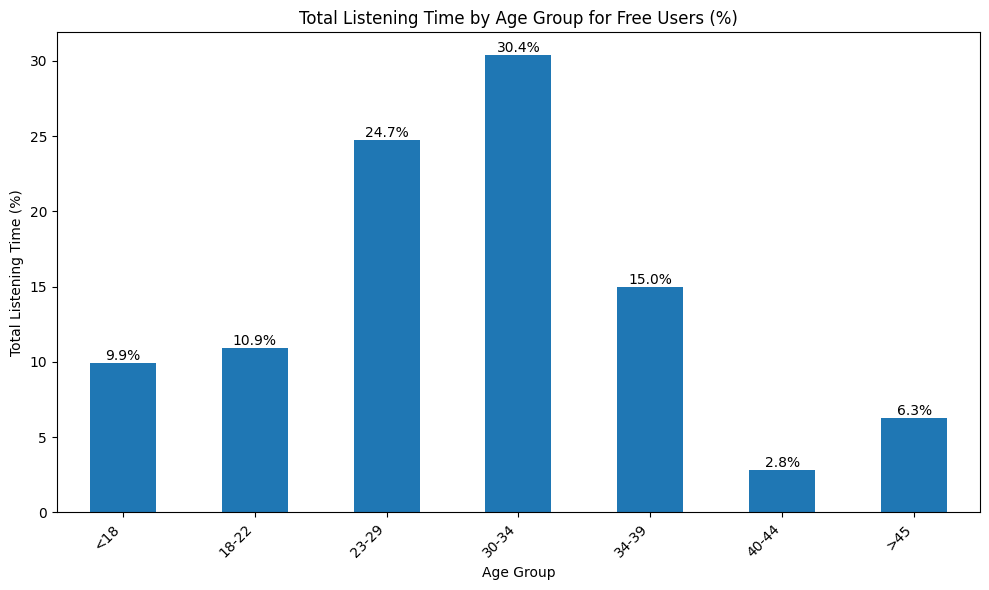

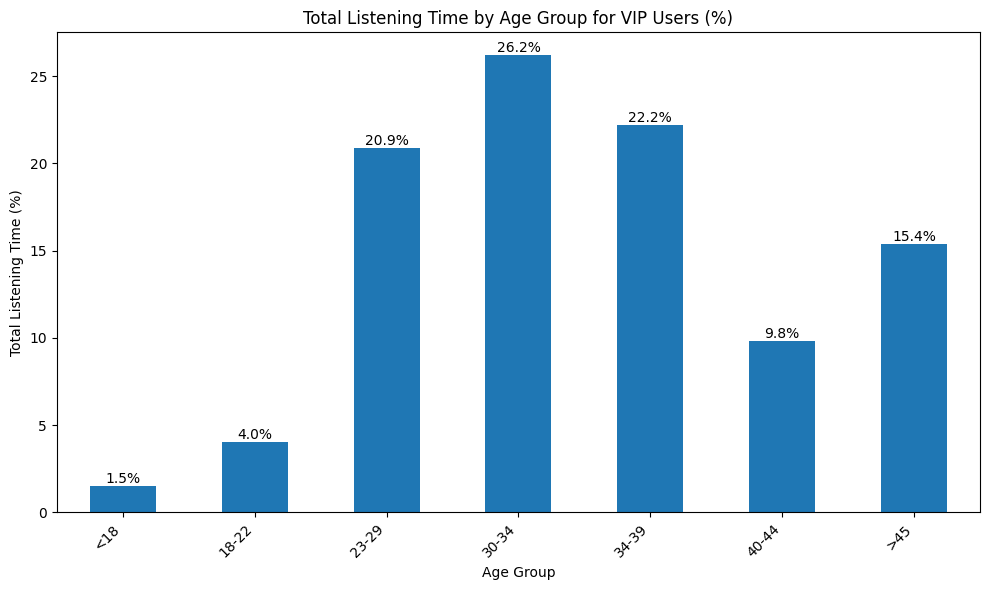

In [101]:
sum_listening_time_by_age_free = listening_time_by_cate_free.groupby('Age group')['duration'].sum()
sum_listening_time_by_age_free_percent = sum_listening_time_by_age_free / sum_listening_time_by_age_free.sum() * 100

sum_listening_time_by_age_vip = listening_time_by_cate_vip.groupby('Age group')['duration'].sum()
sum_listening_time_by_age_vip_percent = sum_listening_time_by_age_vip / sum_listening_time_by_age_vip.sum() * 100


plt.figure(figsize=(10, 6))
ax1 = sum_listening_time_by_age_free_percent.plot(kind='bar')
plt.title('Total Listening Time by Age Group for Free Users (%)')
plt.xlabel('Age Group')
plt.ylabel('Total Listening Time (%)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=age_group_labels, rotation=45, ha='right')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
ax2 = sum_listening_time_by_age_vip_percent.plot(kind='bar')
plt.title('Total Listening Time by Age Group for VIP Users (%)')
plt.xlabel('Age Group')
plt.ylabel('Total Listening Time (%)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=age_group_labels, rotation=45, ha='right')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%')
plt.tight_layout()
plt.show()

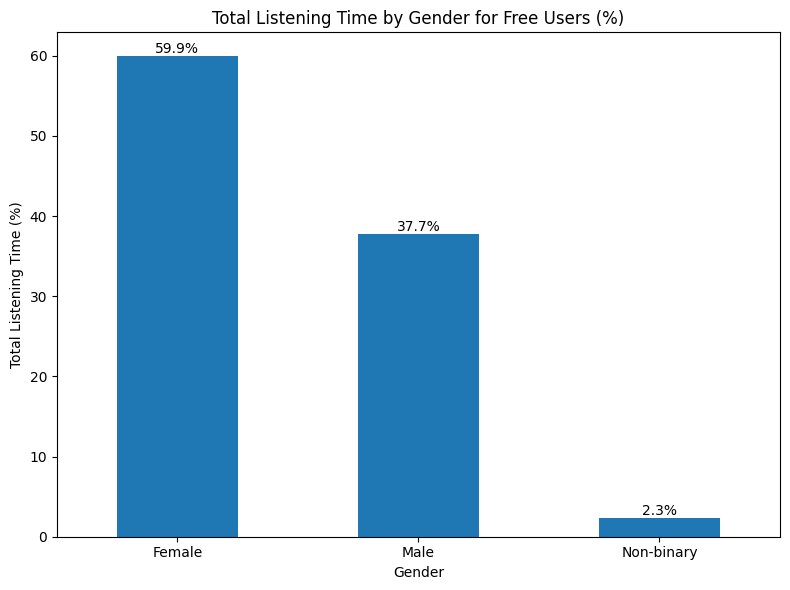

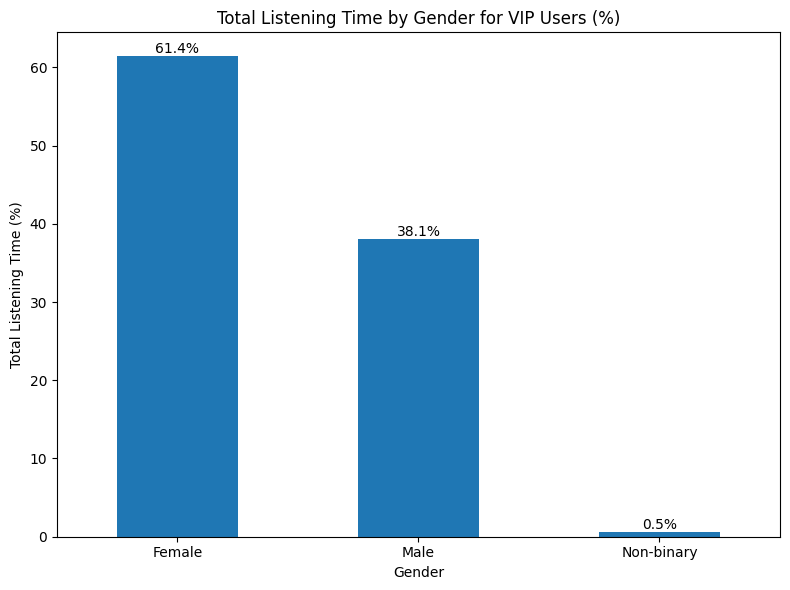

In [102]:
sum_listening_time_by_gender_free = listening_time_by_cate_free.groupby('User Gender')['duration'].sum()
sum_listening_time_by_gender_free_percent = sum_listening_time_by_gender_free / sum_listening_time_by_gender_free.sum() * 100

sum_listening_time_by_gender_vip = listening_time_by_cate_vip.groupby('User Gender')['duration'].sum()
sum_listening_time_by_gender_vip_percent = sum_listening_time_by_gender_vip / sum_listening_time_by_gender_vip.sum() * 100

plt.figure(figsize=(8, 6))
ax1 = sum_listening_time_by_gender_free_percent.plot(kind='bar')
plt.title('Total Listening Time by Gender for Free Users (%)')
plt.xlabel('Gender')
plt.ylabel('Total Listening Time (%)')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'Non-binary'], rotation=0)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
ax2 = sum_listening_time_by_gender_vip_percent.plot(kind='bar')
plt.title('Total Listening Time by Gender for VIP Users (%)')
plt.xlabel('Gender')
plt.ylabel('Total Listening Time (%)')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'Non-binary'], rotation=0)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%')
plt.tight_layout()
plt.show()

In [103]:
gender_labels = ['Female', 'Male', 'Non-binary']

print("Top 10 Listening Time by Category for Free Users by Gender:")
for i, gender_data in listening_time_by_cate_free.groupby('User Gender'):
    top_10_categories = gender_data.groupby('Classify')['duration'].sum().nlargest(10)
    print(f"\n--- {gender_labels[int(i)]} Free Users ---")
    display(top_10_categories)

print("\nTop 10 Listening Time by Category for VIP Users by Gender:")
for i, gender_data in listening_time_by_cate_vip.groupby('User Gender'):
    top_10_categories = gender_data.groupby('Classify')['duration'].sum().nlargest(10)
    print(f"\n--- {gender_labels[int(i)]} VIP Users ---")
    display(top_10_categories)

Top 10 Listening Time by Category for Free Users by Gender:

--- Female Free Users ---


Classify
Truyện ngắn - Tản văn    1384269
Kinh điển                 526569
Other                     512444
Đầu tư làm giàu           379653
Tâm linh                  270610
Lịch sử                   225418
Truyện ma                 114217
Tâm lý                     98823
Tóm tắt sách               50637
Thiền                      47355
Name: duration, dtype: int64


--- Male Free Users ---


Classify
Truyện ngắn - Tản văn    815320
Kinh điển                525375
Tâm linh                 425912
Other                    150066
Lịch sử                  107787
Thiếu nhi                101820
Podcast                   48320
Nuôi dạy con              44292
Tóm tắt sách              38790
Ngôn tình                 37669
Name: duration, dtype: int64


--- Non-binary Free Users ---


Classify
Truyện ngắn - Tản văn    67650
Kinh điển                28857
Đầu tư làm giàu          22420
Lịch sử                   9795
Other                     9619
Trinh thám                2715
Truyện ma                 2022
Tâm linh                  1811
Tóm tắt sách              1287
Đôi lứa                    926
Name: duration, dtype: int64


Top 10 Listening Time by Category for VIP Users by Gender:

--- Female VIP Users ---


Classify
Kinh điển                10882724
Other                     9582476
Đầu tư làm giàu           7295159
Truyện ngắn - Tản văn     7242447
Tâm linh                  7079884
Lịch sử                   3842949
Tâm lý                    1699903
Sức khoẻ                   946835
Sales                      733353
Tóm tắt sách               599007
Name: duration, dtype: int64


--- Male VIP Users ---


Classify
Truyện ngắn - Tản văn    8266639
Kinh điển                5394697
Other                    4776811
Tâm linh                 4700292
Lịch sử                  1714980
Đầu tư làm giàu          1709590
Thiếu nhi                1136430
Tâm lý                   1054649
Ngôn tình                 966837
Sức khoẻ                  585181
Name: duration, dtype: int64


--- Non-binary VIP Users ---


Classify
Kinh điển                99915
Other                    89231
Tâm linh                 69574
Truyện ngắn - Tản văn    36106
Thiền                    31790
Đầu tư làm giàu          30431
Thiếu nhi                27498
Tóm tắt sách             23810
Podcast                  17996
Lịch sử                  16419
Name: duration, dtype: int64

Top 10 Listening Time by Category for Free Users by Gender:

--- Female Free Users ---


Classify
Truyện ngắn - Tản văn    1384269
Kinh điển                 526569
Other                     512444
Đầu tư làm giàu           379653
Tâm linh                  270610
Lịch sử                   225418
Truyện ma                 114217
Tâm lý                     98823
Tóm tắt sách               50637
Thiền                      47355
Name: duration, dtype: int64

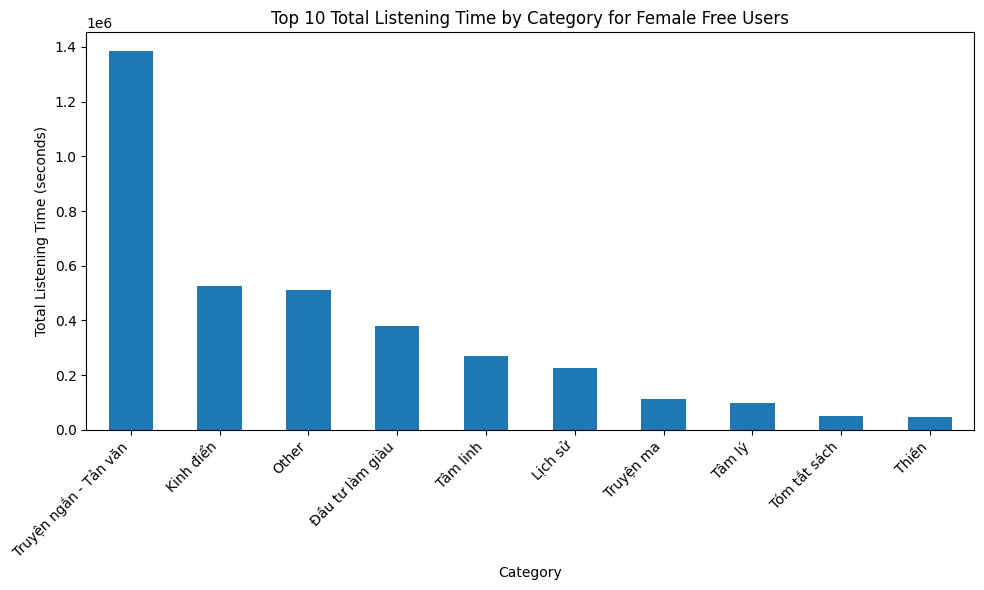


--- Male Free Users ---


Classify
Truyện ngắn - Tản văn    815320
Kinh điển                525375
Tâm linh                 425912
Other                    150066
Lịch sử                  107787
Thiếu nhi                101820
Podcast                   48320
Nuôi dạy con              44292
Tóm tắt sách              38790
Ngôn tình                 37669
Name: duration, dtype: int64

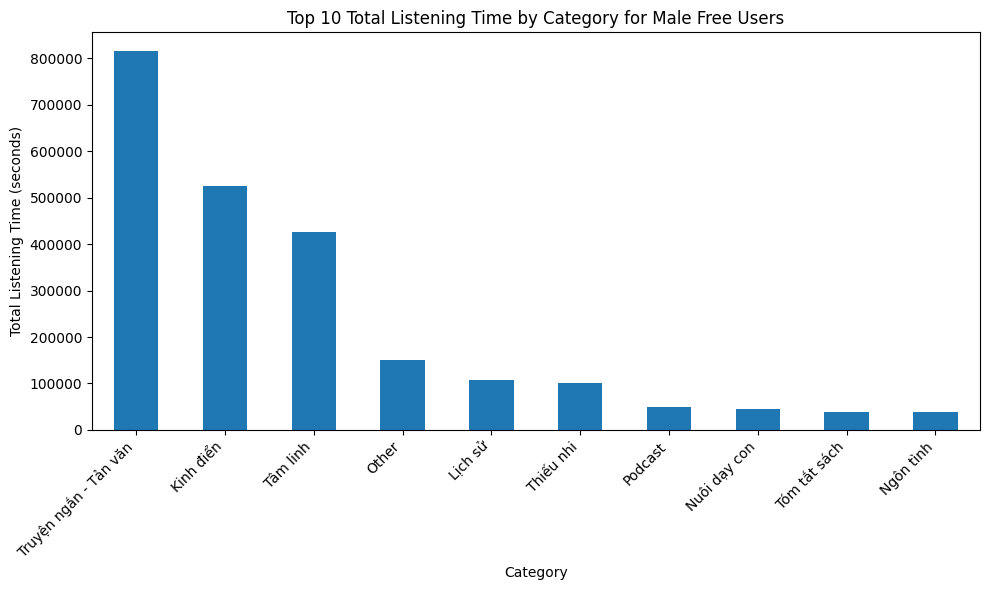


--- Non-binary Free Users ---


Classify
Truyện ngắn - Tản văn    67650
Kinh điển                28857
Đầu tư làm giàu          22420
Lịch sử                   9795
Other                     9619
Trinh thám                2715
Truyện ma                 2022
Tâm linh                  1811
Tóm tắt sách              1287
Đôi lứa                    926
Name: duration, dtype: int64

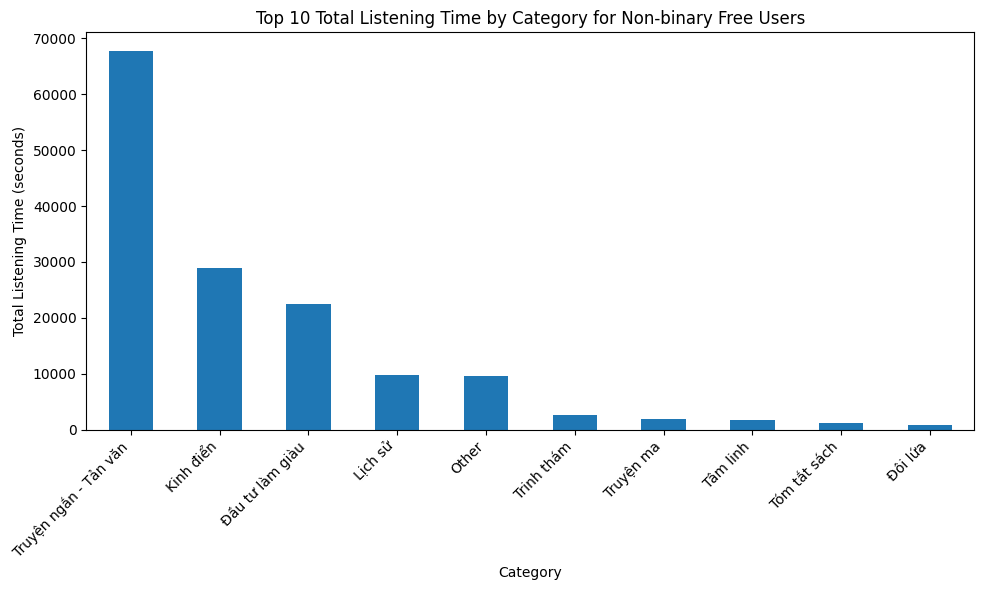


Top 10 Listening Time by Category for VIP Users by Gender:

--- Female VIP Users ---


Classify
Kinh điển                10882724
Other                     9582476
Đầu tư làm giàu           7295159
Truyện ngắn - Tản văn     7242447
Tâm linh                  7079884
Lịch sử                   3842949
Tâm lý                    1699903
Sức khoẻ                   946835
Sales                      733353
Tóm tắt sách               599007
Name: duration, dtype: int64

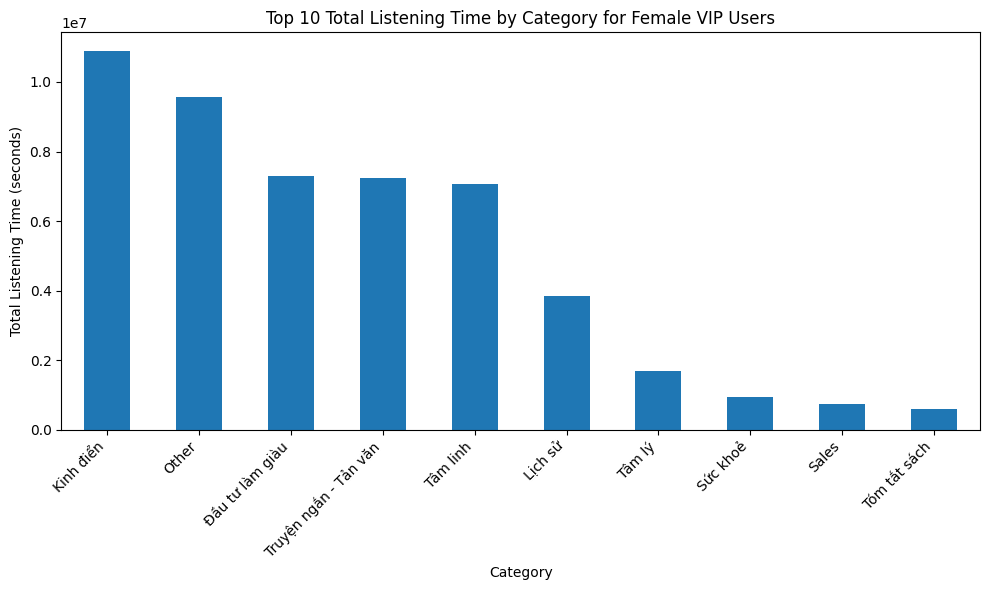


--- Male VIP Users ---


Classify
Truyện ngắn - Tản văn    8266639
Kinh điển                5394697
Other                    4776811
Tâm linh                 4700292
Lịch sử                  1714980
Đầu tư làm giàu          1709590
Thiếu nhi                1136430
Tâm lý                   1054649
Ngôn tình                 966837
Sức khoẻ                  585181
Name: duration, dtype: int64

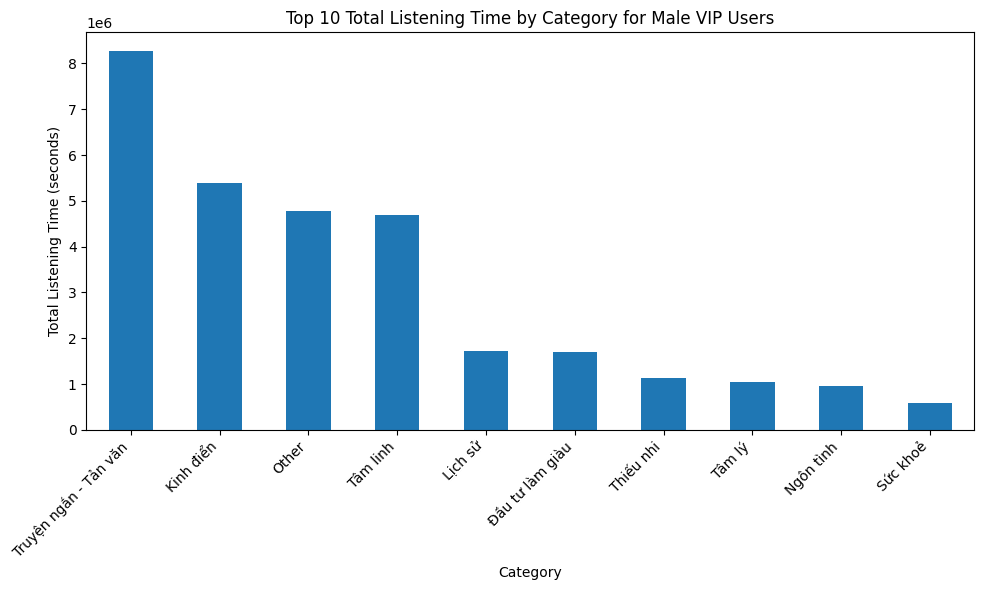


--- Non-binary VIP Users ---


Classify
Kinh điển                99915
Other                    89231
Tâm linh                 69574
Truyện ngắn - Tản văn    36106
Thiền                    31790
Đầu tư làm giàu          30431
Thiếu nhi                27498
Tóm tắt sách             23810
Podcast                  17996
Lịch sử                  16419
Name: duration, dtype: int64

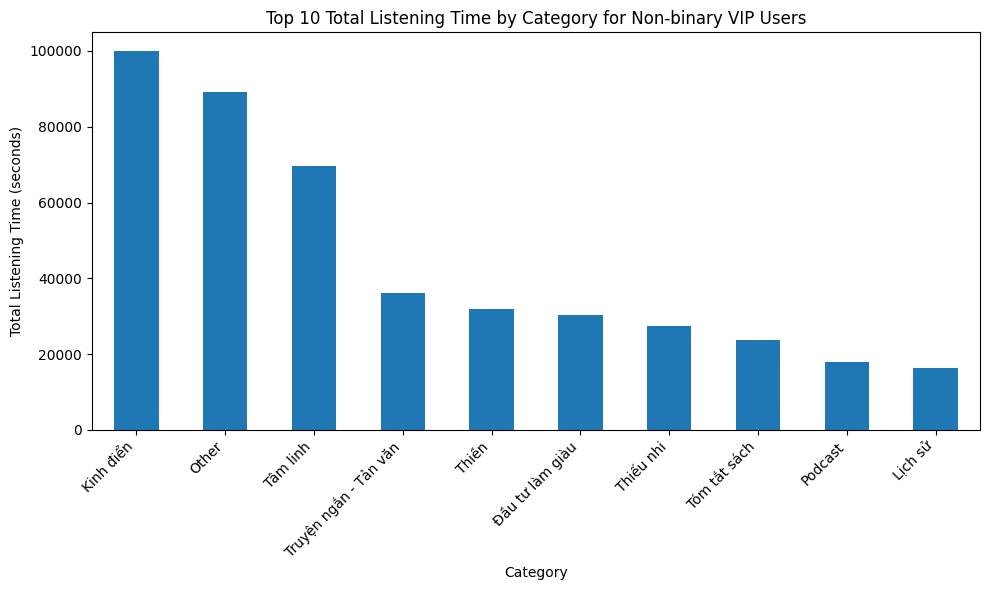

In [104]:
gender_labels = ['Female', 'Male', 'Non-binary']

print("Top 10 Listening Time by Category for Free Users by Gender:")
for i, gender_data in listening_time_by_cate_free.groupby('User Gender'):
    top_10_categories = gender_data.groupby('Classify')['duration'].sum().nlargest(10)
    print(f"\n--- {gender_labels[int(i)]} Free Users ---")
    display(top_10_categories)

    plt.figure(figsize=(10, 6))
    top_10_categories.plot(kind='bar')
    plt.title(f'Top 10 Total Listening Time by Category for {gender_labels[int(i)]} Free Users')
    plt.xlabel('Category')
    plt.ylabel('Total Listening Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\nTop 10 Listening Time by Category for VIP Users by Gender:")
for i, gender_data in listening_time_by_cate_vip.groupby('User Gender'):
    top_10_categories = gender_data.groupby('Classify')['duration'].sum().nlargest(10)
    print(f"\n--- {gender_labels[int(i)]} VIP Users ---")
    display(top_10_categories)

    plt.figure(figsize=(10, 6))
    top_10_categories.plot(kind='bar')
    plt.title(f'Top 10 Total Listening Time by Category for {gender_labels[int(i)]} VIP Users')
    plt.xlabel('Category')
    plt.ylabel('Total Listening Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Top 10 Listening Time by Category for Free Users by Age Group:


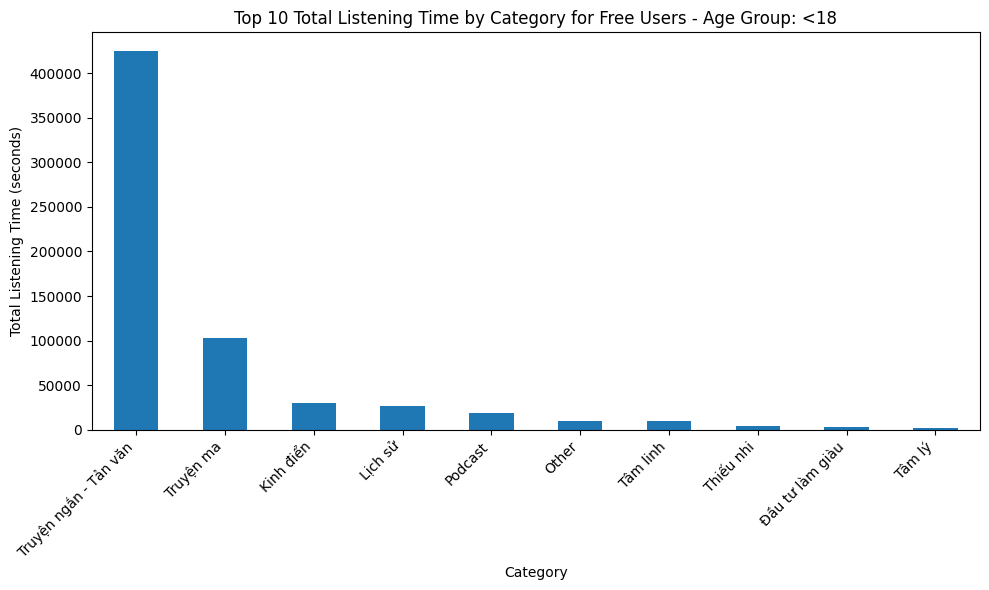

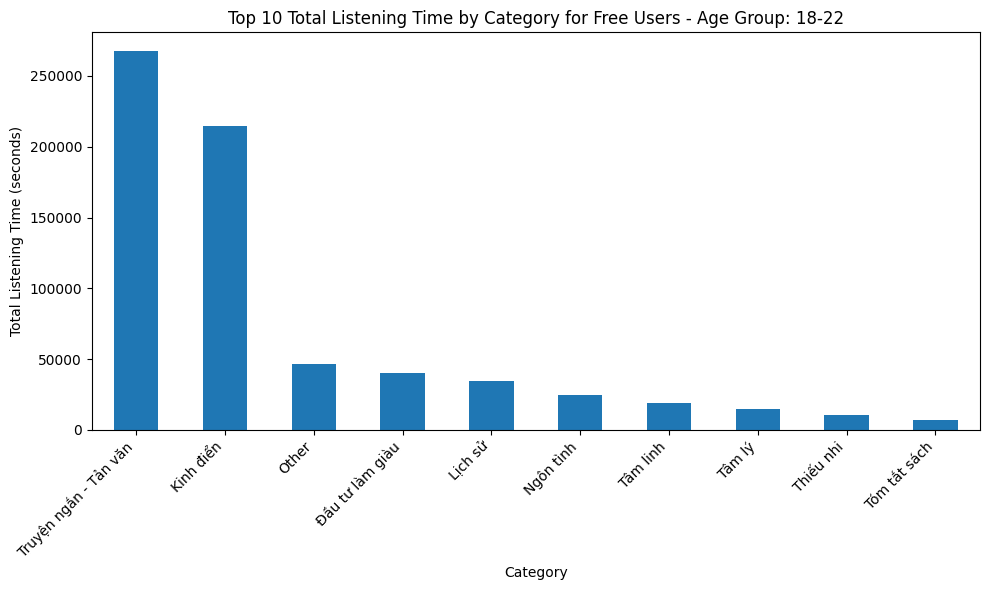

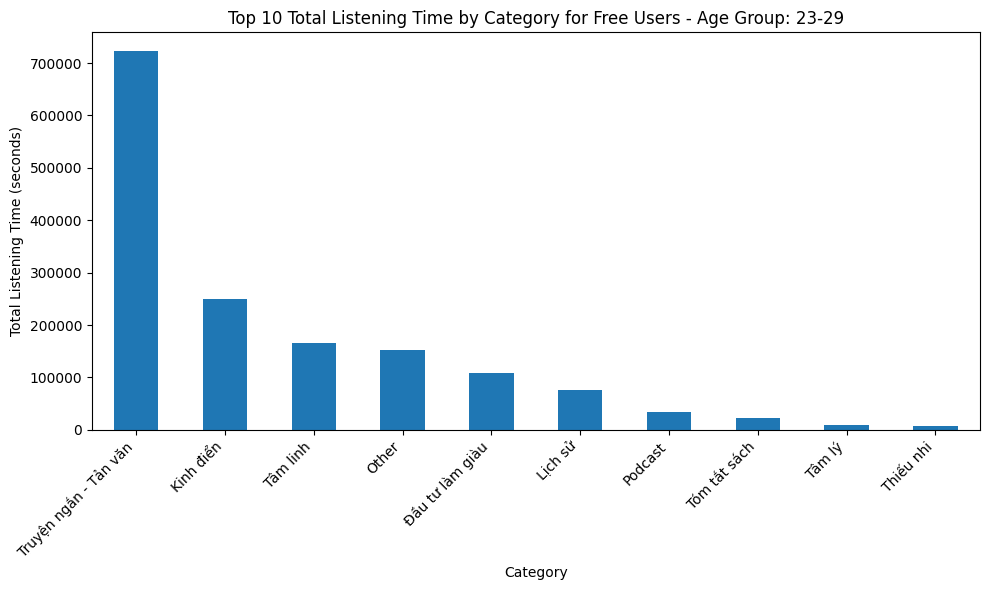

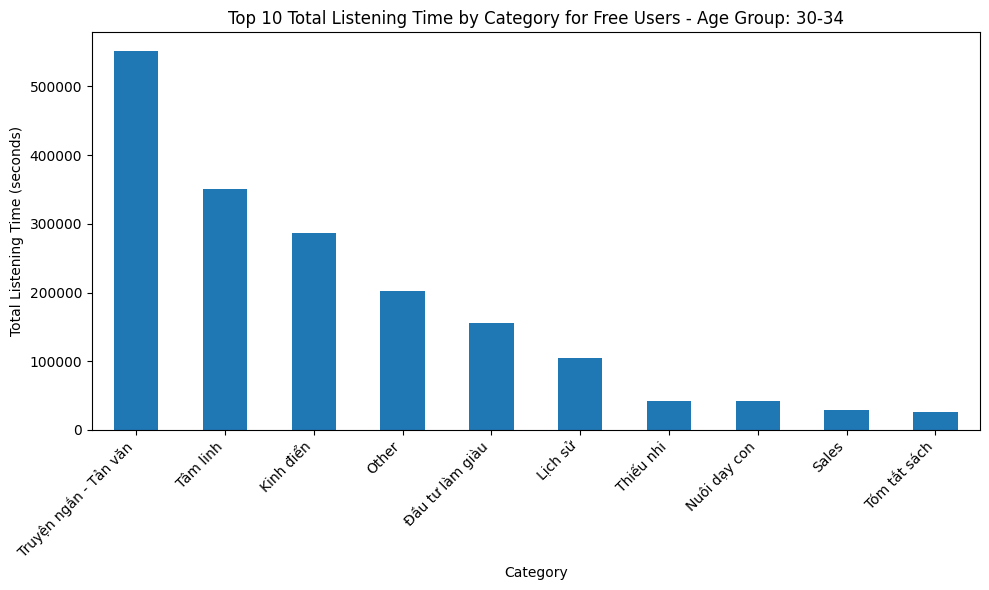

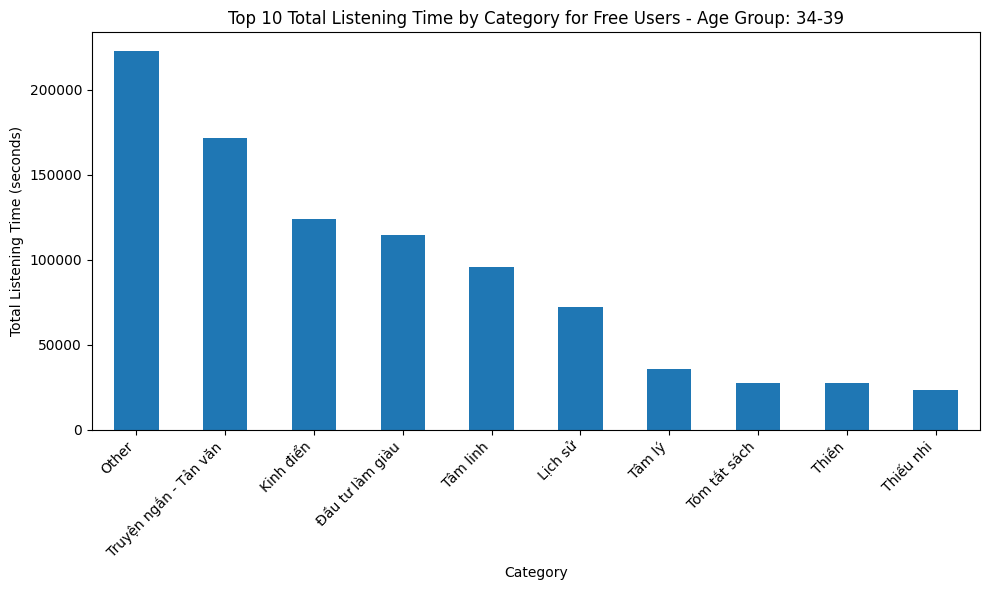

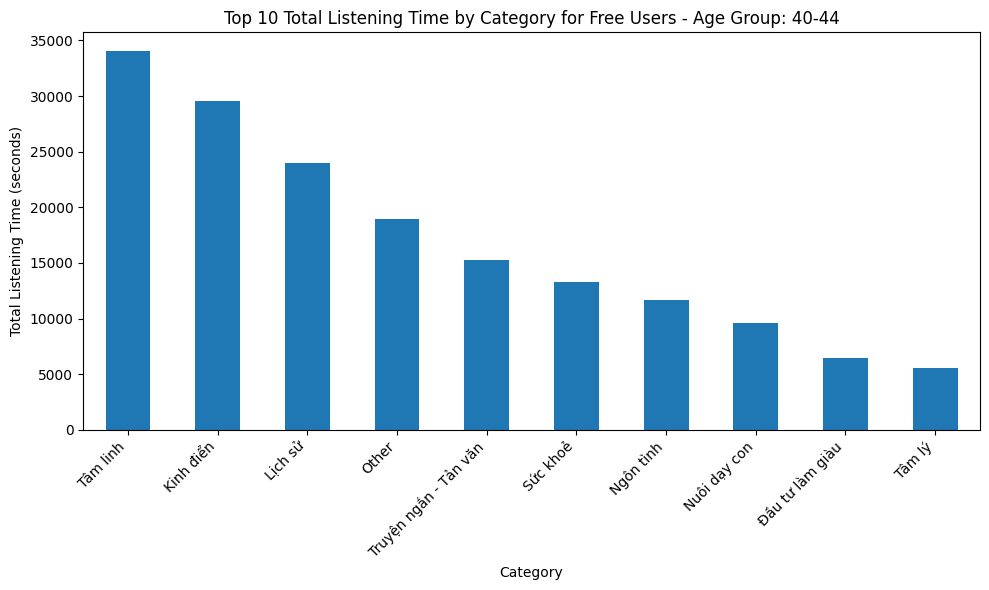

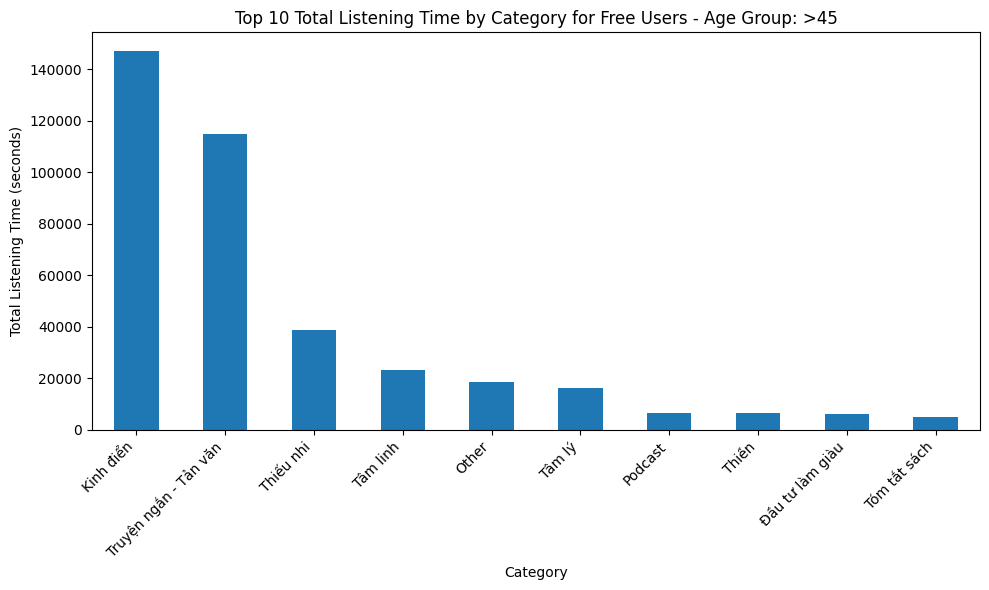


Top 10 Listening Time by Category for VIP Users by Age Group:


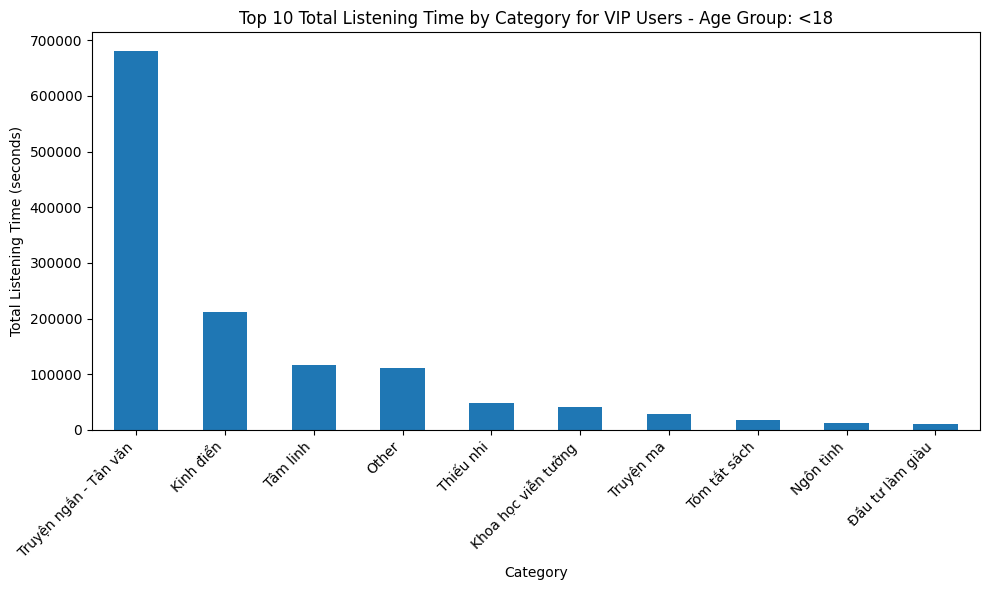

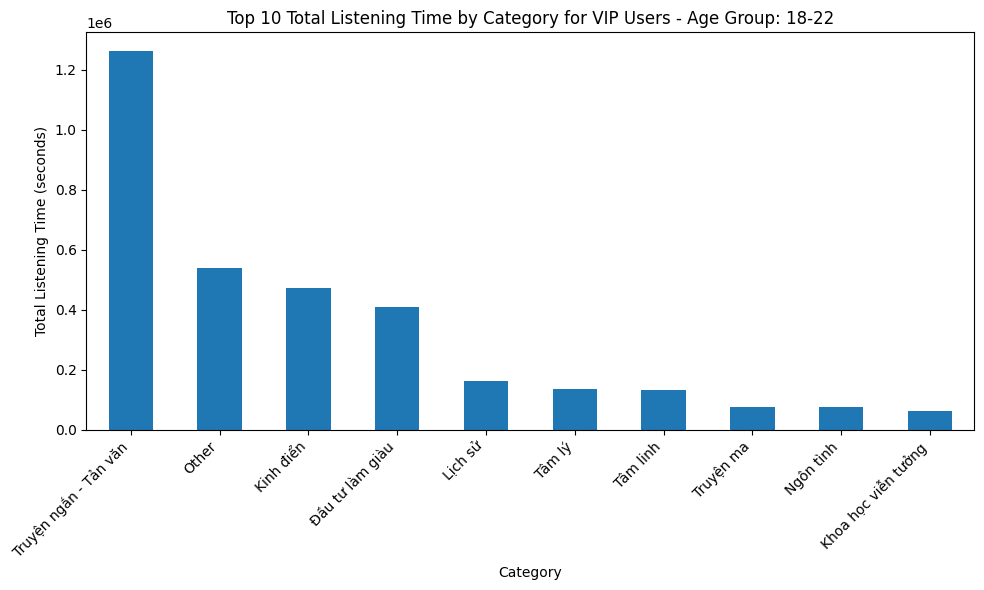

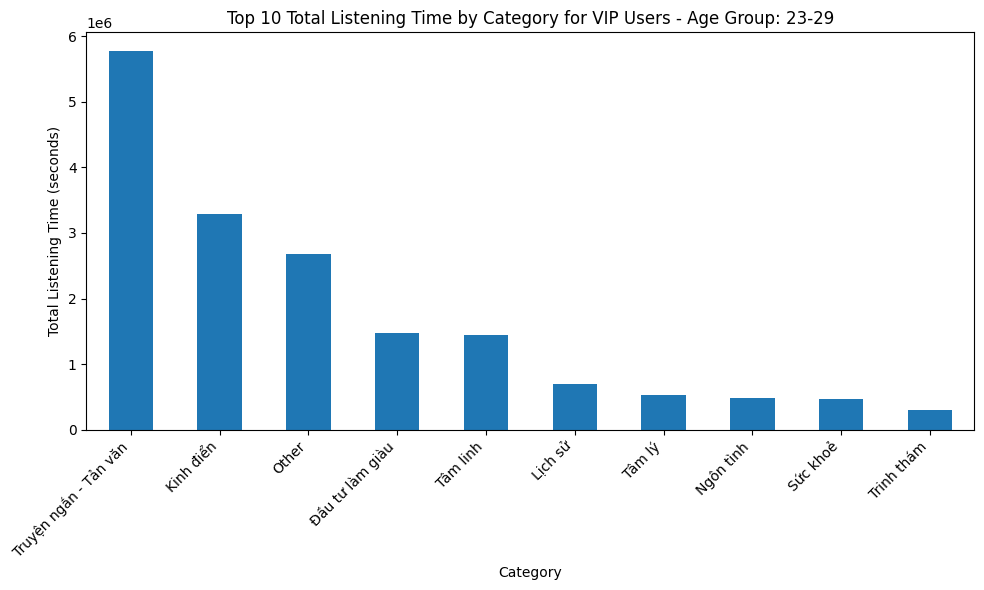

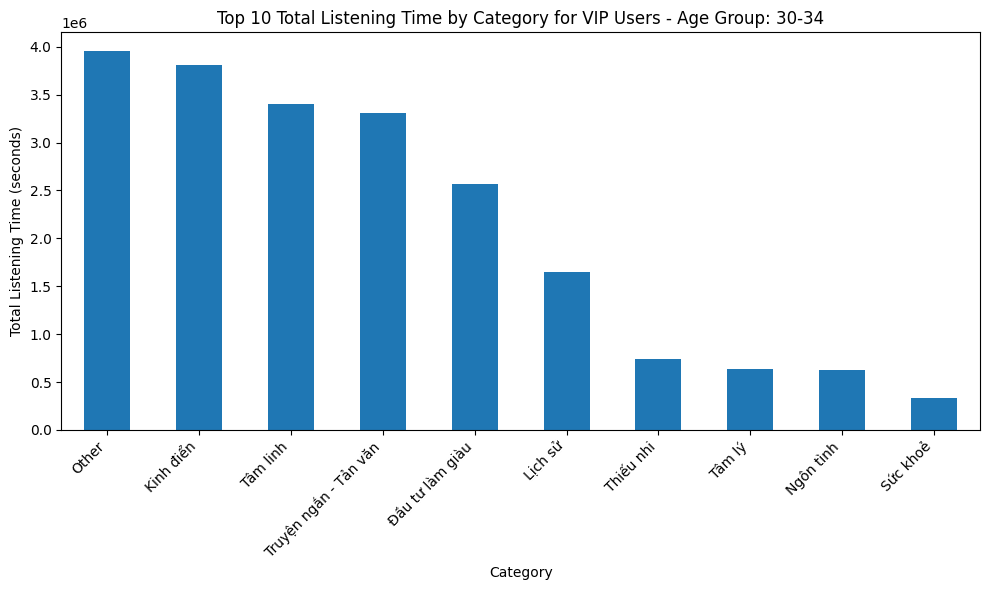

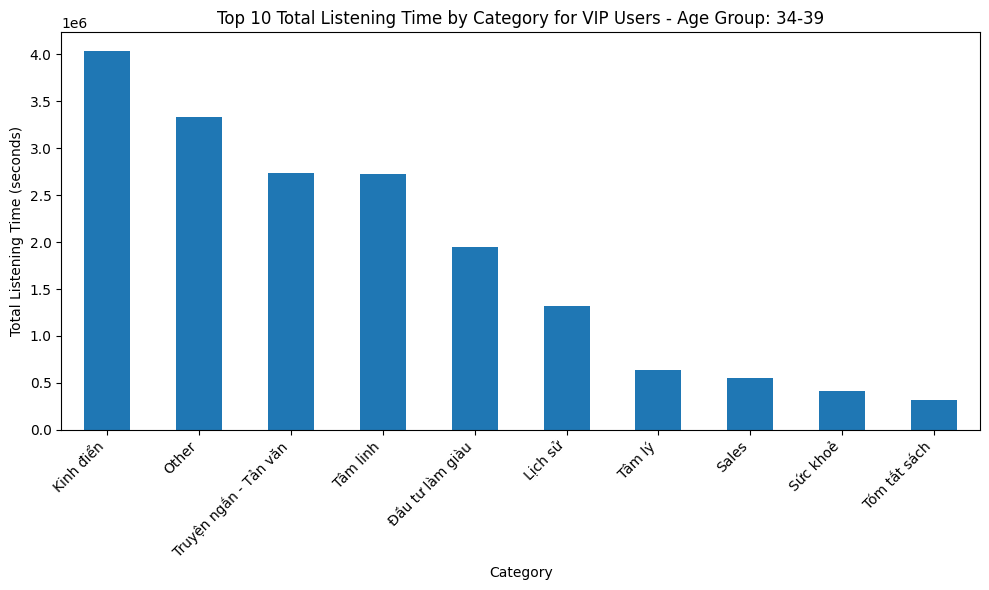

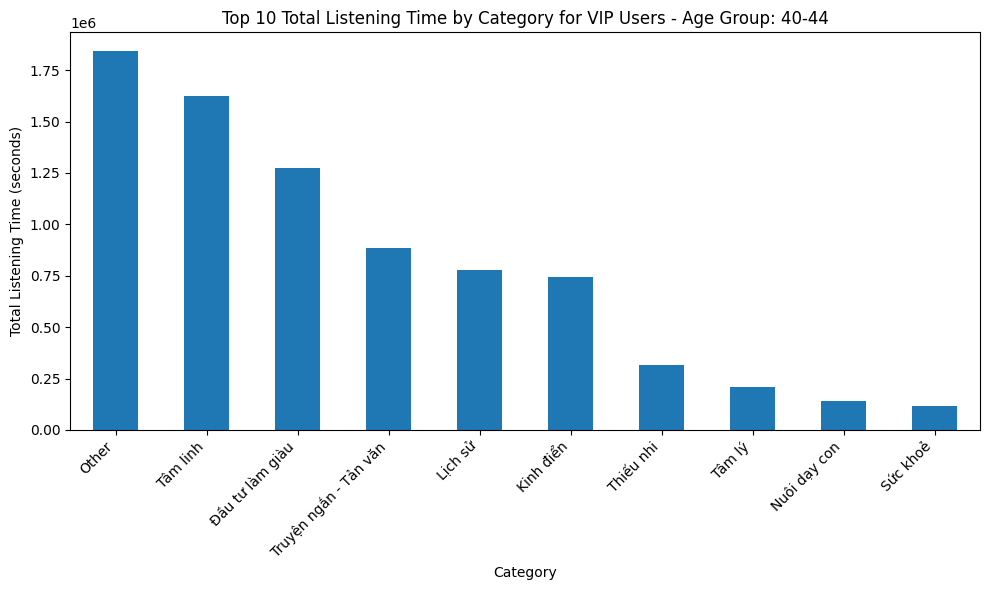

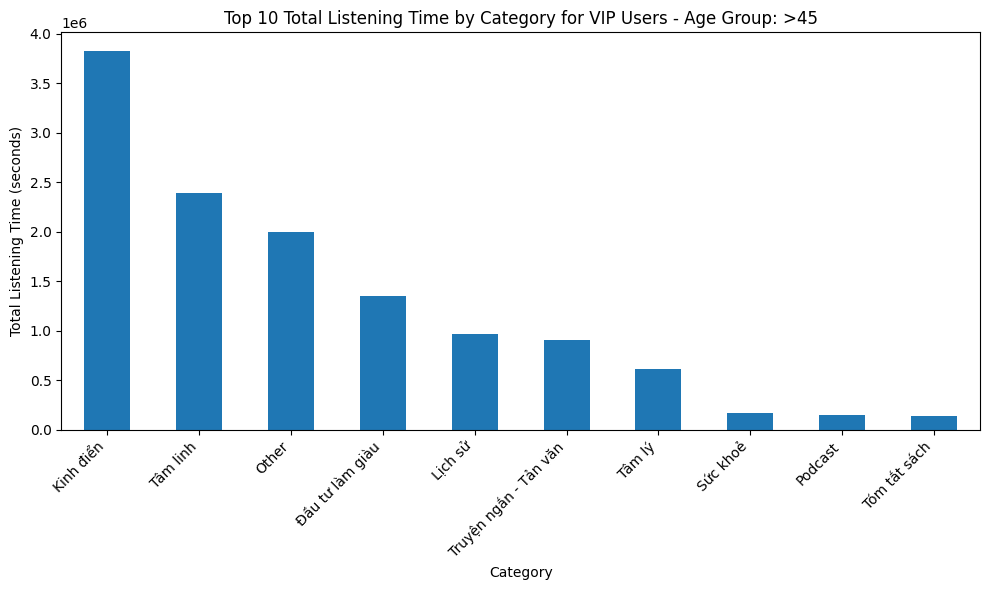

In [105]:
age_group_labels = ['<18', '18-22', '23-29', '30-34', '34-39', '40-44', '>45']

print("Top 10 Listening Time by Category for Free Users by Age Group:")
for i, age_group_data in listening_time_by_cate_free.groupby('Age group'):
    top_10_categories = age_group_data.groupby('Classify')['duration'].sum().nlargest(10)
    #print(f"\n--- Free Users - Age Group: {age_group_labels[int(i)-1]} ---")
    #display(top_10_categories)

    plt.figure(figsize=(10, 6))
    top_10_categories.plot(kind='bar')
    plt.title(f'Top 10 Total Listening Time by Category for Free Users - Age Group: {age_group_labels[int(i)-1]}')
    plt.xlabel('Category')
    plt.ylabel('Total Listening Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\nTop 10 Listening Time by Category for VIP Users by Age Group:")
for i, age_group_data in listening_time_by_cate_vip.groupby('Age group'):
    top_10_categories = age_group_data.groupby('Classify')['duration'].sum().nlargest(10)
    #print(f"\n--- VIP Users - Age Group: {age_group_labels[int(i)-1]} ---")
    #display(top_10_categories)

    plt.figure(figsize=(10, 6))
    top_10_categories.plot(kind='bar')
    plt.title(f'Top 10 Total Listening Time by Category for VIP Users - Age Group: {age_group_labels[int(i)-1]}')
    plt.xlabel('Category')
    plt.ylabel('Total Listening Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [106]:
# Unpack data into groups based on gender types
df_lis_free_female= listening_time_by_cate_free[listening_time_by_cate_free['User Gender']==0]
df_lis_free_male= listening_time_by_cate_free[listening_time_by_cate_free['User Gender']==1]
df_lis_free_nonbinary= listening_time_by_cate_free[listening_time_by_cate_free['User Gender']==2]

df_lis_vip_female= listening_time_by_cate_vip[listening_time_by_cate_vip['User Gender']==0]
df_lis_vip_male= listening_time_by_cate_vip[listening_time_by_cate_vip['User Gender']==1]
df_lis_vip_nonbinary= listening_time_by_cate_vip[listening_time_by_cate_vip['User Gender']==2]


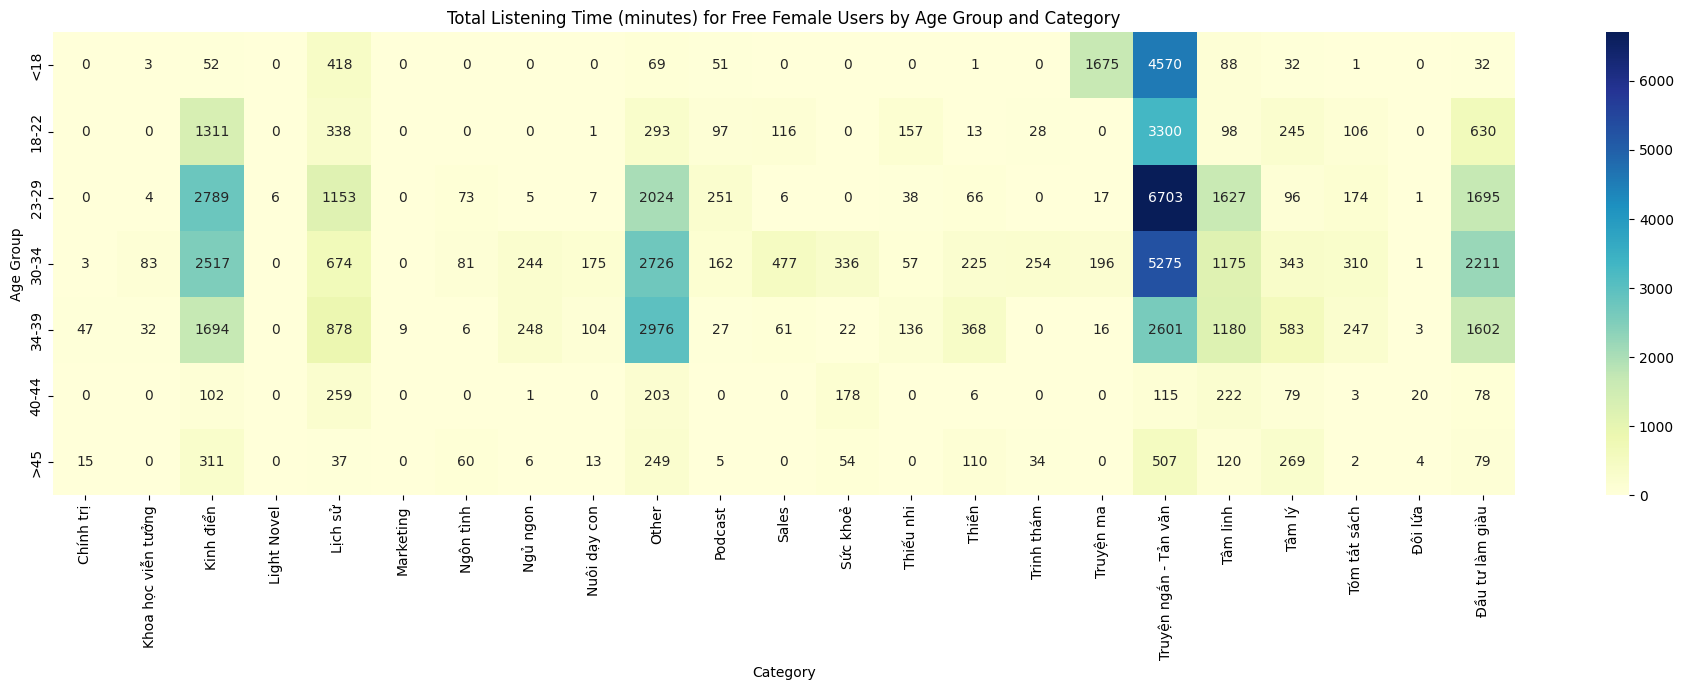

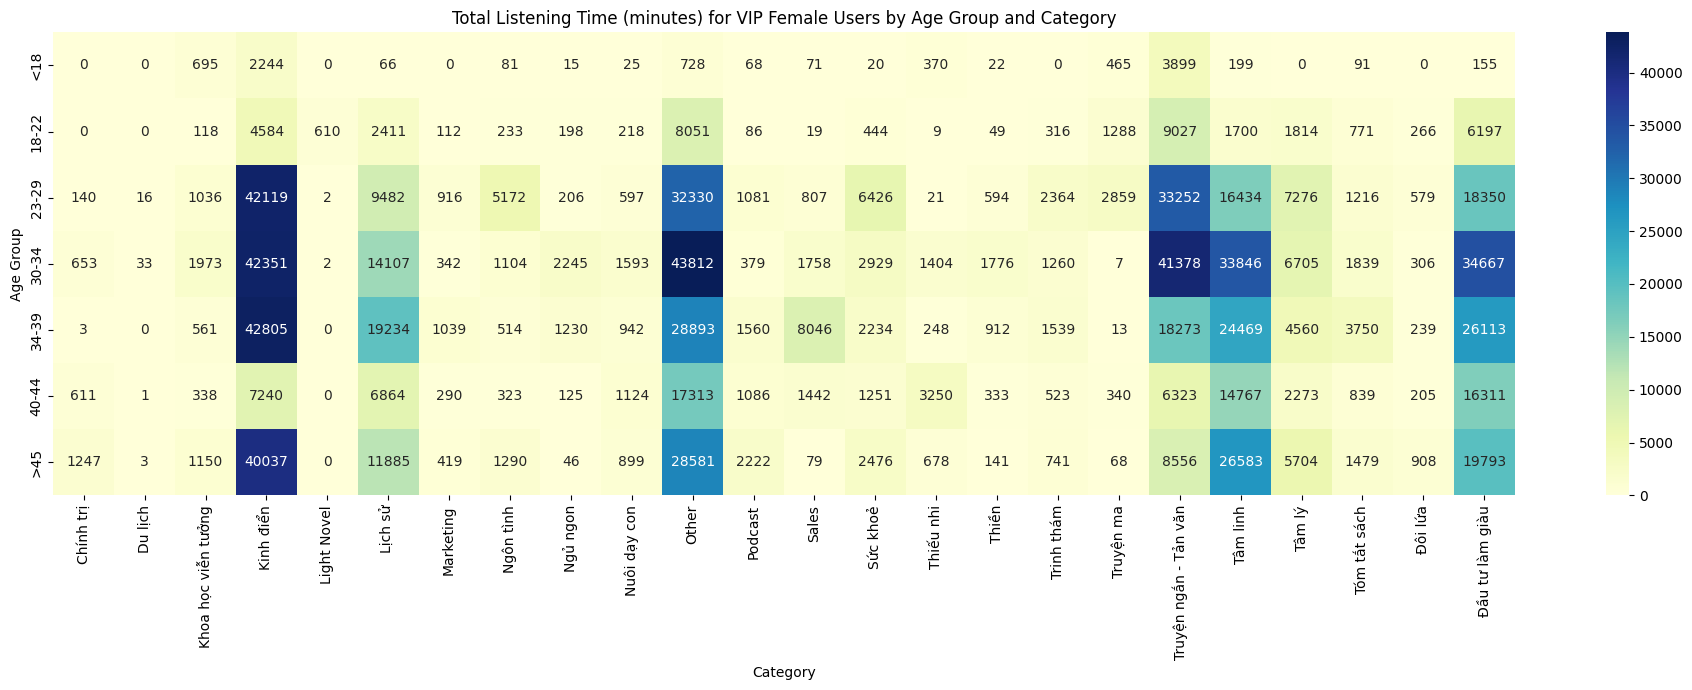

In [107]:
# Group data by age group and category and calculate total listening time
heatmap_data_free = df_lis_free_female.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60

# Map age group numbers to labels for better readability
age_group_labels_dict = {1.0: '<18', 2.0: '18-22', 3.0: '23-29', 4.0: '30-34', 5.0: '34-39', 6.0: '40-44', 7.0: '>45'}
heatmap_data_free = heatmap_data_free.rename(index=age_group_labels_dict)

# Plot the heatmap for Free Female Users
plt.figure(figsize=(19, 7))
sns.heatmap(heatmap_data_free, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Total Listening Time (minutes) for Free Female Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Group data by age group and category and calculate total listening time for VIP Female Users
heatmap_data_vip = df_lis_vip_female.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60

# Map age group numbers to labels for better readability
heatmap_data_vip = heatmap_data_vip.rename(index=age_group_labels_dict)

# Plot the heatmap for VIP Female Users
plt.figure(figsize=(19, 7))
sns.heatmap(heatmap_data_vip, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Total Listening Time (minutes) for VIP Female Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

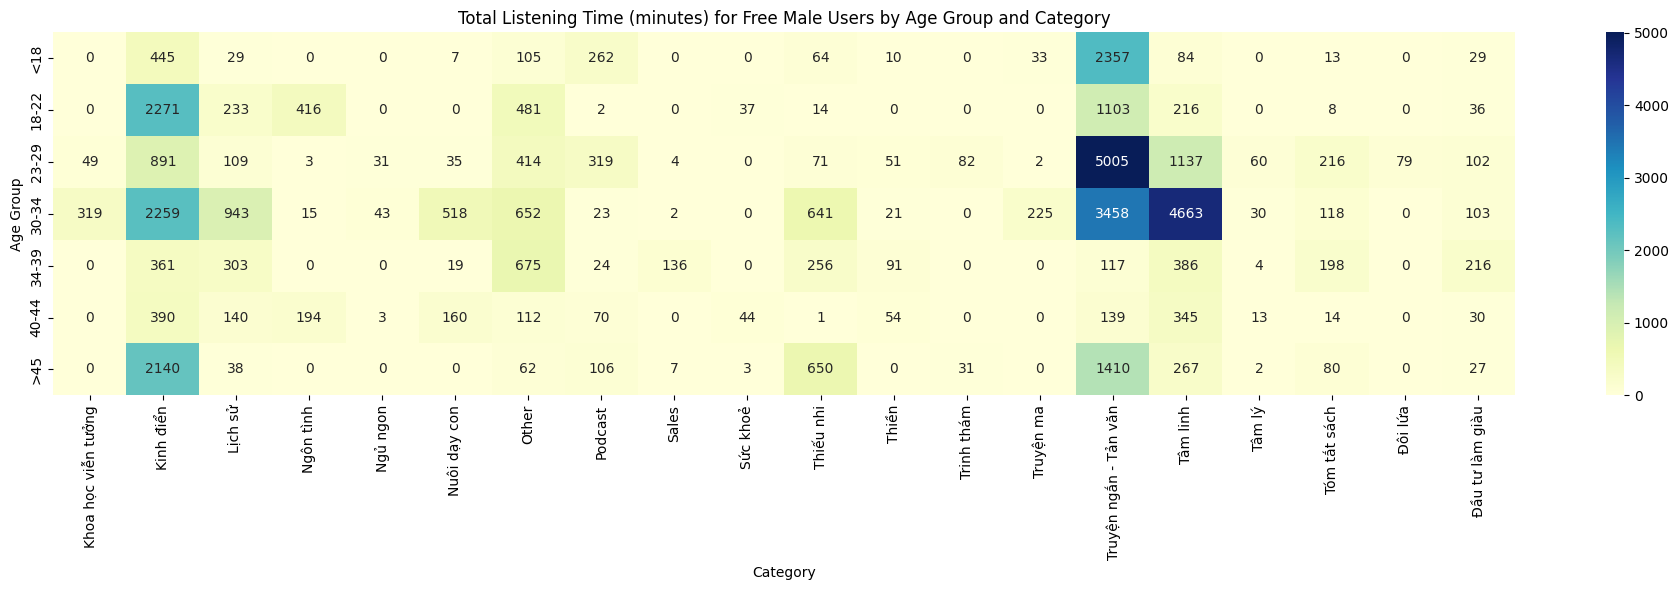

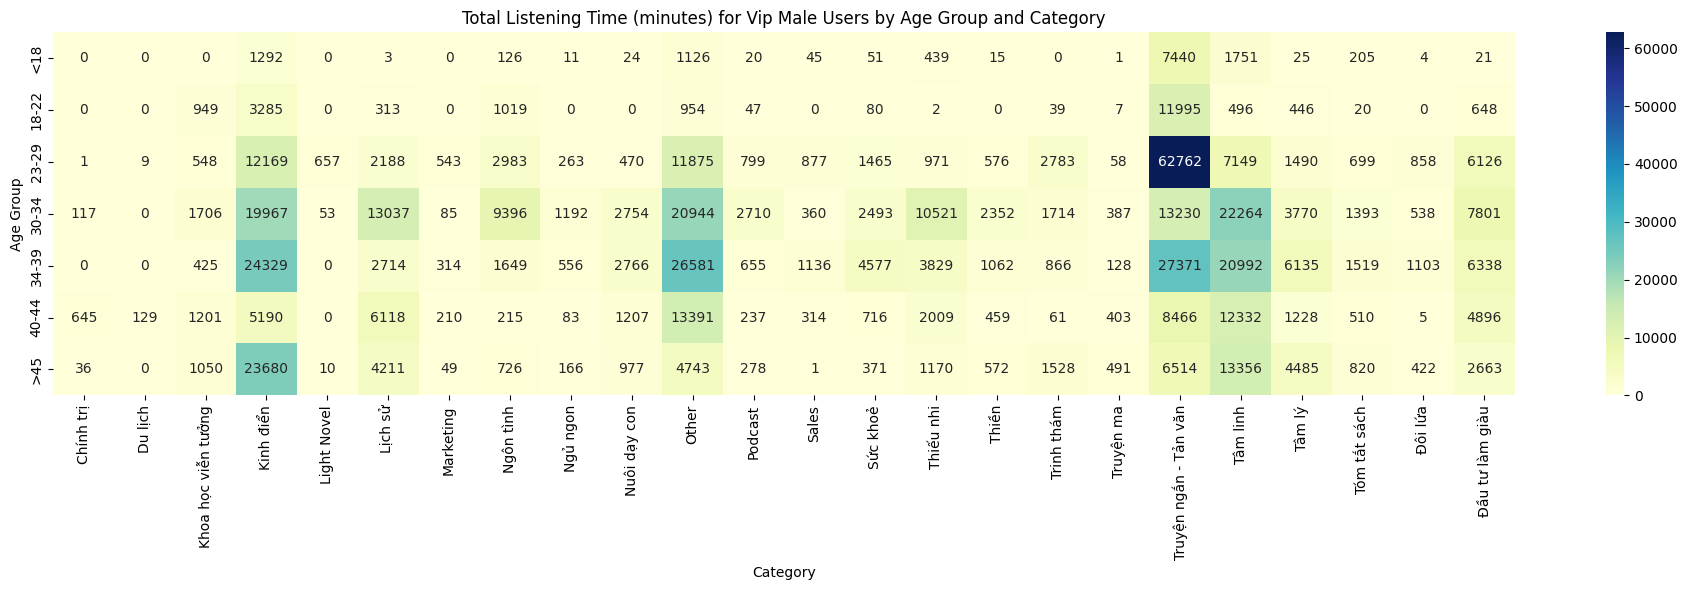

In [108]:
# Group data by age group and category and calculate total listening time
heatmap_data = df_lis_free_male.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60

# Map age group numbers to labels for better readability
age_group_labels_dict = {1.0: '<18', 2.0: '18-22', 3.0: '23-29', 4.0: '30-34', 5.0: '34-39', 6.0: '40-44', 7.0: '>45'}
heatmap_data = heatmap_data.rename(index=age_group_labels_dict)

# Plot the heatmap
plt.figure(figsize=(19, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Total Listening Time (minutes) for Free Male Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Group data by age group and category and calculate total listening time
heatmap_data = df_lis_vip_male.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60

# Map age group numbers to labels for better readability
age_group_labels_dict = {1.0: '<18', 2.0: '18-22', 3.0: '23-29', 4.0: '30-34', 5.0: '34-39', 6.0: '40-44', 7.0: '>45'}
heatmap_data = heatmap_data.rename(index=age_group_labels_dict)

# Plot the heatmap
plt.figure(figsize=(19, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Total Listening Time (minutes) for Vip Male Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

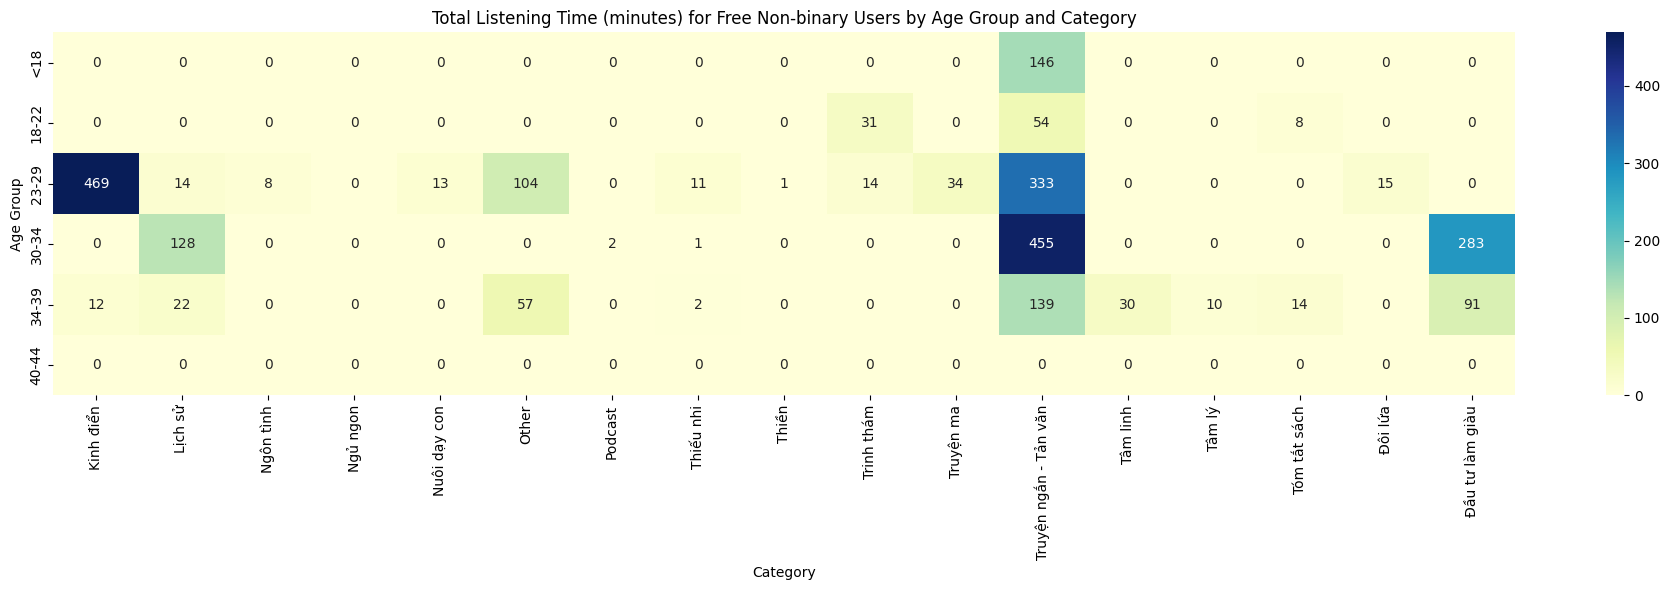

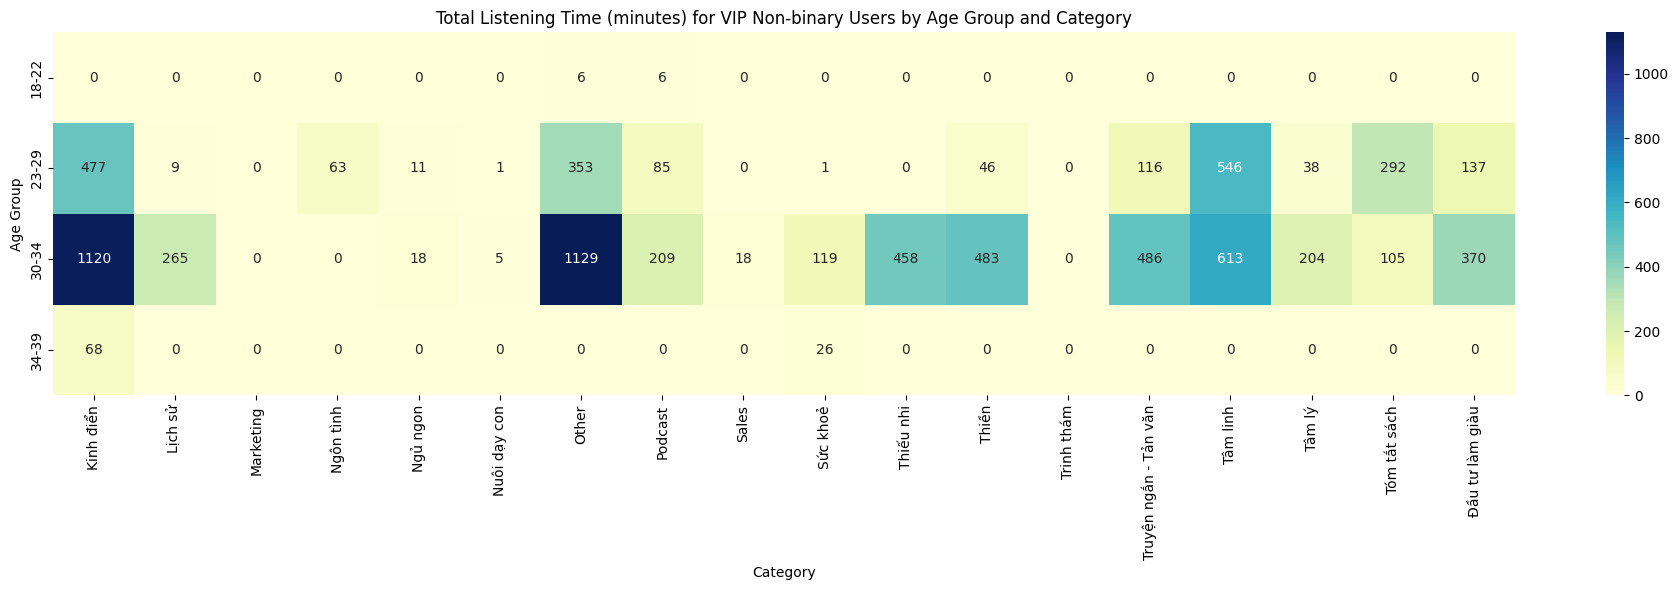

In [109]:
# Group data by age group and category and calculate total listening time for Free Non-binary Users
heatmap_data_free_nonbinary = df_lis_free_nonbinary.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60

# Map age group numbers to labels for better readability
age_group_labels_dict = {1.0: '<18', 2.0: '18-22', 3.0: '23-29', 4.0: '30-34', 5.0: '34-39', 6.0: '40-44', 7.0: '>45'}
heatmap_data_free_nonbinary = heatmap_data_free_nonbinary.rename(index=age_group_labels_dict)

# Plot the heatmap for Free Non-binary Users
plt.figure(figsize=(19, 6))
sns.heatmap(heatmap_data_free_nonbinary, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Total Listening Time (minutes) for Free Non-binary Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Group data by age group and category and calculate total listening time for VIP Non-binary Users
heatmap_data_vip_nonbinary = df_lis_vip_nonbinary.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60

# Map age group numbers to labels for better readability
heatmap_data_vip_nonbinary = heatmap_data_vip_nonbinary.rename(index=age_group_labels_dict)

# Plot the heatmap for VIP Non-binary Users
plt.figure(figsize=(19, 6))
sns.heatmap(heatmap_data_vip_nonbinary, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Total Listening Time (minutes) for VIP Non-binary Users by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [110]:
df_vip_female = df_user_vip_survey[df_user_vip_survey['User Gender'] == 0].copy()
temp_fem_by_age_group=df_vip_female.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

df_vip_male = df_user_vip_survey[df_user_vip_survey['User Gender'] == 1].copy()
temp_male_by_age_group=df_vip_male.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

df_vip_nonbinary = df_user_vip_survey[df_user_vip_survey['User Gender'] == 2].copy()
temp_nonbinary_by_age_group=df_vip_nonbinary.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

df_free_female = df_user_free_survey[df_user_free_survey['User Gender'] == 0].copy()
temp_fem_by_age_group_free=df_free_female.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

df_free_male = df_user_free_survey[df_user_free_survey['User Gender'] == 1].copy()
temp_male_by_age_group_free=df_free_male.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

df_free_nonbinary = df_user_free_survey[df_user_free_survey['User Gender'] == 2].copy()
temp_nonbinary_by_age_group_free=df_free_nonbinary.groupby('Age group')[['Podcast', 'Tóm tắt sách', 'Thiếu nhi', 'Chính trị',
       'Lịch sử', 'Thiền', 'Ngủ ngon', 'Đôi lứa', 'Nuôi dạy con',
       'Đầu tư làm giàu', 'Sức khoẻ', 'Marketing', 'Sales', 'Tâm linh',
       'Tâm lý', 'Du lịch', 'Ngôn tình', 'Trinh thám', 'Kinh điển', 'Thơ',
       'Truyện ngắn - Tản văn', 'Khoa học viễn tưởng', 'Light Novel',
       'Truyện ma', 'LGBT+']].count()

heatmap_data_female_free = df_lis_free_female.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60
heatmap_data_female_vip = df_lis_vip_female.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60

heatmap_data_male_free = df_lis_free_male.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60
heatmap_data_male_vip = df_lis_vip_male.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60

heatmap_data_free_nonbinary = df_lis_free_nonbinary.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60
heatmap_data_vip_nonbinary = df_lis_vip_nonbinary.groupby(['Age group', 'Classify'])['duration'].sum().unstack().fillna(0)/60

# Calculate the Pearson correlation between the two dataframes
correlation_female_free = heatmap_data_female_free.corrwith(temp_fem_by_age_group_free, method='pearson')
correlation_female_vip = heatmap_data_female_vip.corrwith(temp_fem_by_age_group, method='pearson')

correlation_male_free = heatmap_data_male_free.corrwith(temp_male_by_age_group_free, method='pearson')
correlation_male_vip = heatmap_data_male_vip.corrwith(temp_male_by_age_group, method='pearson')

correlation_nonbinary_free = heatmap_data_free_nonbinary.corrwith(temp_nonbinary_by_age_group_free, method='pearson')
correlation_nonbonary_vip = heatmap_data_vip_nonbinary.corrwith(temp_nonbinary_by_age_group, method='pearson')

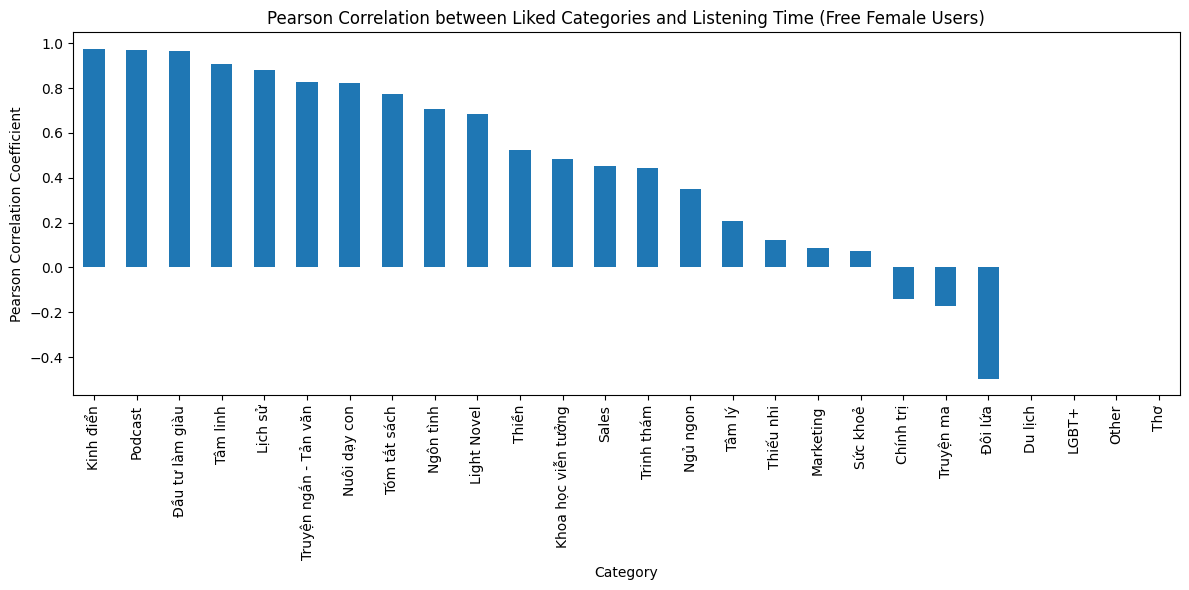

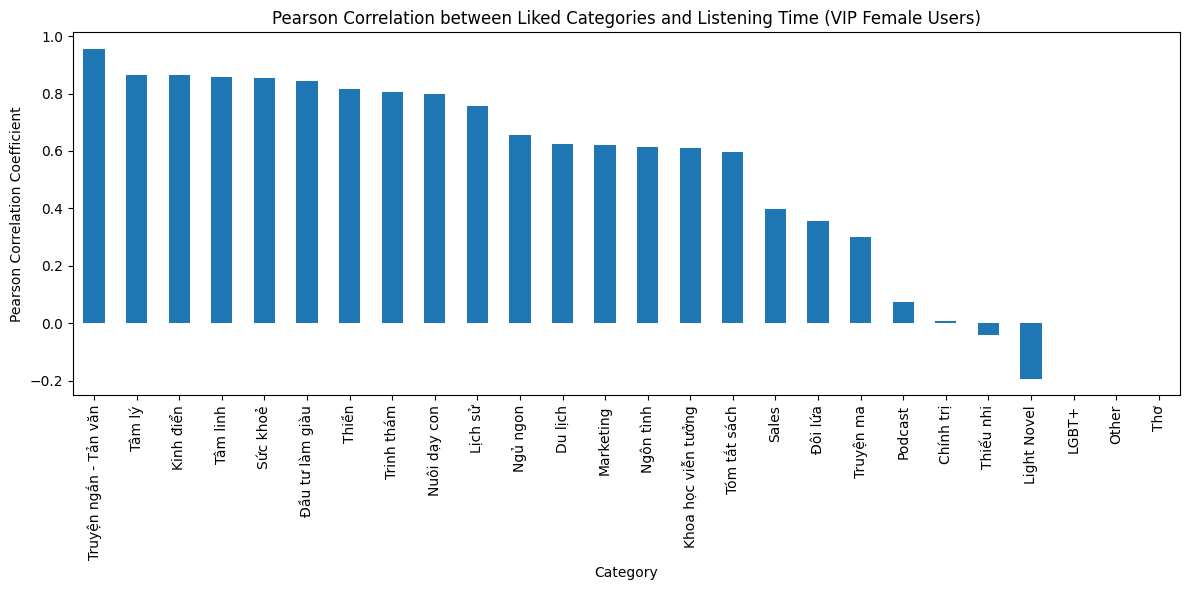

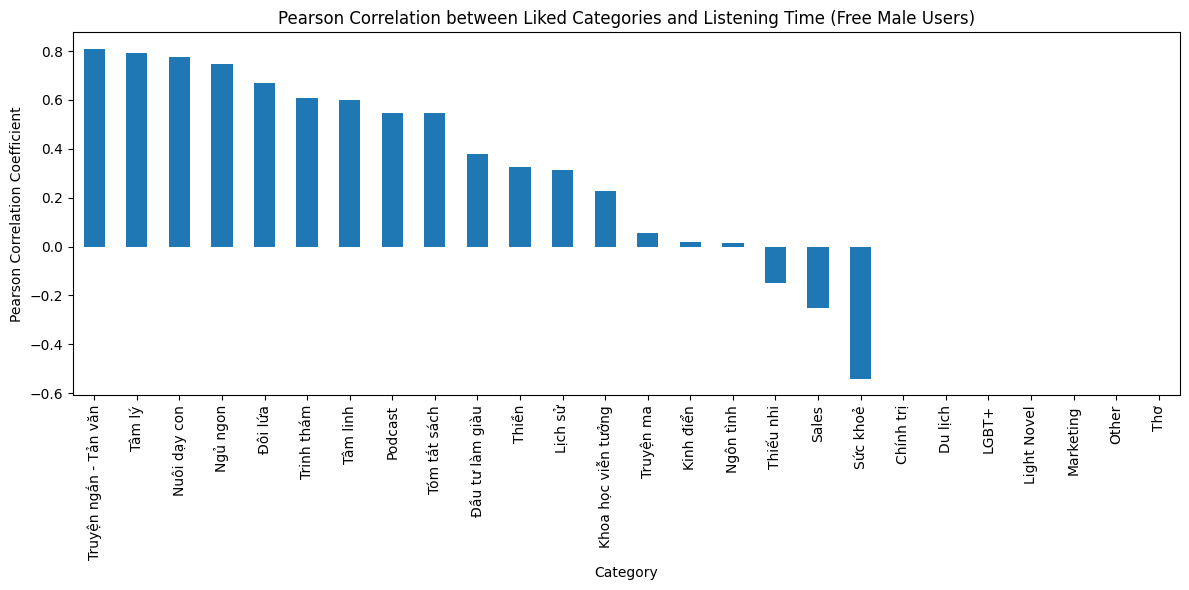

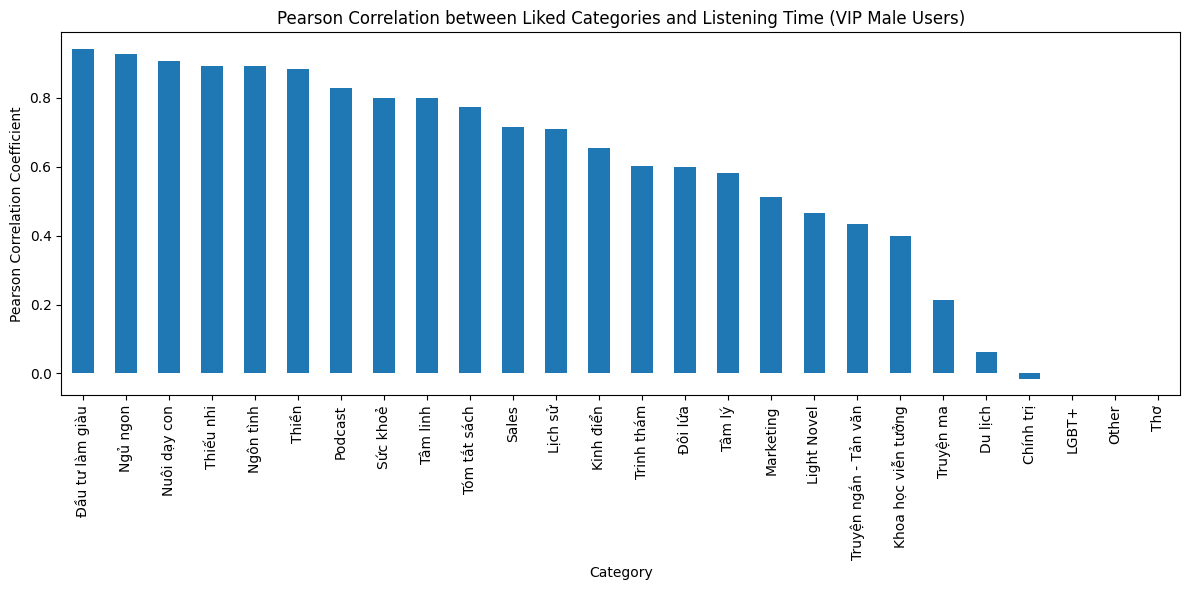

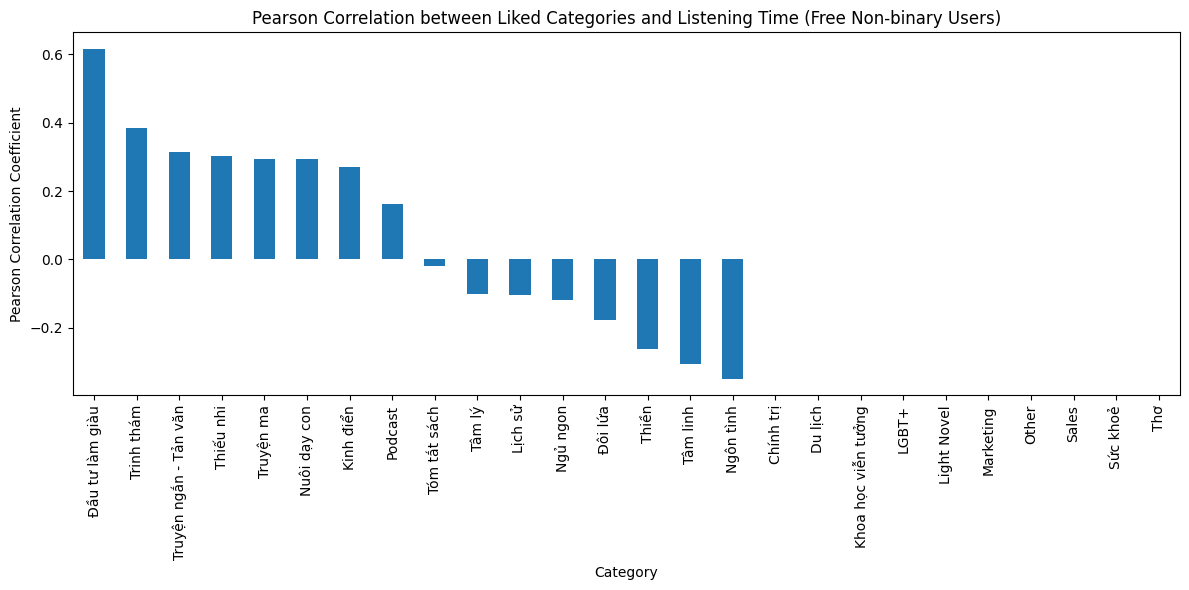

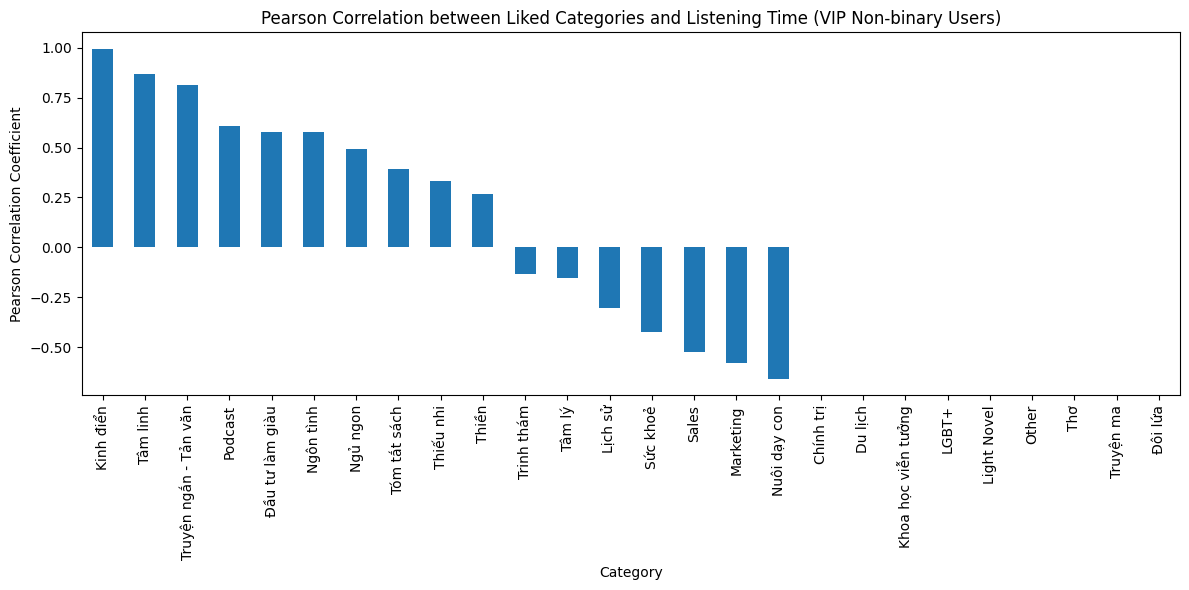

In [111]:
# Plot the correlation for Free Female Users
plt.figure(figsize=(12, 6))
correlation_female_free.sort_values(ascending=False).plot(kind='bar')
plt.title('Pearson Correlation between Liked Categories and Listening Time (Free Female Users)')
plt.xlabel('Category')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot the correlation for VIP Female Users
plt.figure(figsize=(12, 6))
correlation_female_vip.sort_values(ascending=False).plot(kind='bar')
plt.title('Pearson Correlation between Liked Categories and Listening Time (VIP Female Users)')
plt.xlabel('Category')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot the correlation for Free Male Users
plt.figure(figsize=(12, 6))
correlation_male_free.sort_values(ascending=False).plot(kind='bar')
plt.title('Pearson Correlation between Liked Categories and Listening Time (Free Male Users)')
plt.xlabel('Category')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot the correlation for VIP Male Users
plt.figure(figsize=(12, 6))
correlation_male_vip.sort_values(ascending=False).plot(kind='bar')
plt.title('Pearson Correlation between Liked Categories and Listening Time (VIP Male Users)')
plt.xlabel('Category')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot the correlation for Free Non-binary Users
plt.figure(figsize=(12, 6))
correlation_nonbinary_free.sort_values(ascending=False).plot(kind='bar')
plt.title('Pearson Correlation between Liked Categories and Listening Time (Free Non-binary Users)')
plt.xlabel('Category')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot the correlation for VIP Non-binary Users
plt.figure(figsize=(12, 6))
correlation_nonbonary_vip.sort_values(ascending=False).plot(kind='bar')
plt.title('Pearson Correlation between Liked Categories and Listening Time (VIP Non-binary Users)')
plt.xlabel('Category')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Detailed User Listening Analysis Insights

Based on the analysis of the user listening behavior data, the following detailed insights can be drawn:

**Overall Listening Time by Category:**
* From the heatmap, the categories with the highest total listening time vary significantly across age groups and genders, highlighting the importance of personalized content recommendations.

*   **"Truyện ngắn - Tản văn"** and **"Kinh điển"** are consistently among the top categories with the highest total listening time for both **Free** and **VIP** users. This suggests a broad appeal for these content types across the user base.
*   The **"Other"** category accounts for a significant portion of listening time, particularly for VIP users. Further investigation into the content within this category could reveal valuable insights into unmet content demands or niche interests among VIP subscribers. **It is also highly recommended that all the categories which are classified as "Other" be included in the user survey to obtain more useful data.**
*   **"Tâm linh"** and **"Đầu tư làm giàu"** also show substantial listening times for both user types, indicating an interest in financial topics.

**Listening Time by Age Group:**

*   The age groups with the highest total listening time for both **Free** and **VIP** users are concentrated in the **23-39 age range**. This aligns with the user survey data and suggests that this demographic is the most actively engaged on the platform in terms of listening duration.
*   While the 23-39 age range dominates for both user types, **VIP users show a more significant percentage of total listening time from older age groups (40+)** compared to Free users. This could imply that older users who are engaged with the platform are more likely to convert to or retain a VIP subscription. Targeted content or features for these older demographics might be beneficial for VIP user acquisition and retention.
*   The **"<18"** age group has the lowest percentage of total listening time for both user types, which is expected given the likely content focus and user base demographics of the platform.  **However, the Free <18 age group may be targeted for discount/promotion to gain profits from them, as they are have significantly more listening time than that of than the same age group in the VIP plan**.

**Listening Time by Gender:**

*   For both **Free** and **VIP** users, **Female users contribute the majority of the total listening time**, followed by Male users, and then Non-binary users. This is consistent with the gender distribution observed in the user survey data.
*   The proportional distribution of total listening time across genders is remarkably similar between Free and VIP users, suggesting that gender influences listening duration in a similar manner regardless of subscription plan.

**Correlation analysis**:


*   For most user groups, several categories show a strong positive Pearson correlation. This indicates that users who liked these categories also tend to spend more time listening to content within those categories. This is a good sign that user preferences, as indicated by the survey, align well with their actual listening behavior for many content types.
*   "Truyện ngắn - Tản văn" and "Kinh điển" consistently appear among the top categories with high positive correlations across multiple user groups, especially for female and male users in both Free and VIP plans. This aligns with the previous observation that these are popular content types.

*   The "Other" category, while having significant listening time, is not available in the survey. Therefore, it is strongly recommended that these "unclassified" categories be included in the survey for further tracking and analysis.





**Key Takeaways:**

*   The core content pillars (**"Truyện ngắn - Tản văn"**, **"Kinh điển"**, **"Tâm linh"**, **"Đầu tư làm giàu"**) are popular across the user base. The user survey is generally consistent with the corresponding listening time, which shows that users honestly participated in the survey.
*   Targeting the **23-39 age range** is crucial for overall engagement.
*   Older demographics (40+) are a valuable segment for **VIP users**, suggesting potential for tailored strategies.
*   **Female users** are the primary drivers of listening time.
*   Further exploration of the **"Other"** category is recommended to understand diverse content interests, especially among VIP users.
*   Analyzing the top categories within specific age-gender groups can help refine content acquisition and recommendation algorithms for better personalization.

This detailed analysis of listening behavior provides a foundation for understanding user engagement patterns and can inform content strategy, marketing efforts, and feature development for VoizFM.

In [115]:
!pip install pypandoc
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [116]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/VoizFM-Tan Pham.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/VoizFM-Tan Pham.ipynb to pdf
[NbConvertApp] Support files will be in VoizFM-Tan Pham_files/
[NbConvertApp] Making directory ./VoizFM-Tan Pham_files
[NbConvertApp] Writing 265067 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 3704881 bytes to /content/drive/MyDrive/Colab Notebooks/VoizFM-Tan Pham.pdf
